In [ ]:
!pip install ultralytics
!pip install -U ipywidgets

Collecting ultralytics
  Downloading ultralytics-8.3.39-py3-none-any.whl.metadata (35 kB)
Requirement already satisfied: numpy>=1.23.0 in /usr/local/lib/python3.10/dist-packages (from ultralytics) (1.26.4)
Requirement already satisfied: matplotlib>=3.3.0 in /usr/local/lib/python3.10/dist-packages (from ultralytics) (3.8.0)
Requirement already satisfied: opencv-python>=4.6.0 in /usr/local/lib/python3.10/dist-packages (from ultralytics) (4.10.0.84)
Requirement already satisfied: pillow>=7.1.2 in /usr/local/lib/python3.10/dist-packages (from ultralytics) (11.0.0)
Requirement already satisfied: pyyaml>=5.3.1 in /usr/local/lib/python3.10/dist-packages (from ultralytics) (6.0.2)
Requirement already satisfied: requests>=2.23.0 in /usr/local/lib/python3.10/dist-packages (from ultralytics) (2.32.3)
Requirement already satisfied: scipy>=1.4.1 in /usr/local/lib/python3.10/dist-packages (from ultralytics) (1.13.1)
Requirement already satisfied: torch>=1.8.0 in /usr/local/lib/python3.10/dist-packages (from ultralytics) (2.5.1+cu121)
Requirement already satisfied: torchvision>=0.9.0 in /usr/local/lib/python3.10/dist-packages (from ultralytics) (0.20.1+cu121)
Requirement already satisfied: tqdm>=4.64.0 in /usr/local/lib/python3.10/dist-packages (from ultralytics) (4.66.6)
Requirement already satisfied: psutil in /usr/local/lib/python3.10/dist-packages (from ultralytics) (5.9.5)
Requirement already satisfied: py-cpuinfo in /usr/local/lib/python3.10/dist-packages (from ultralytics) (9.0.0)
Requirement already satisfied: pandas>=1.1.4 in /usr/local/lib/python3.10/dist-packages (from ultralytics) (2.2.2)
Requirement already satisfied: seaborn>=0.11.0 in /usr/local/lib/python3.10/dist-packages (from ultralytics) (0.13.2)
Collecting ultralytics-thop>=2.0.0 (from ultralytics)
  Downloading ultralytics_thop-2.0.12-py3-none-any.whl.metadata (9.4 kB)
Requirement already satisfied: contourpy>=1.0.1 in /usr/local/lib/python3.10/dist-packages (from matplotlib>=3.3.0->ultralytics) (1.3.1)
Requirement already satisfied: cycler>=0.10 in /usr/local/lib/python3.10/dist-packages (from matplotlib>=3.3.0->ultralytics) (0.12.1)
Requirement already satisfied: fonttools>=4.22.0 in /usr/local/lib/python3.10/dist-packages (from matplotlib>=3.3.0->ultralytics) (4.55.0)
Requirement already satisfied: kiwisolver>=1.0.1 in /usr/local/lib/python3.10/dist-packages (from matplotlib>=3.3.0->ultralytics) (1.4.7)
Requirement already satisfied: packaging>=20.0 in /usr/local/lib/python3.10/dist-packages (from matplotlib>=3.3.0->ultralytics) (24.2)
Requirement already satisfied: pyparsing>=2.3.1 in /usr/local/lib/python3.10/dist-packages (from matplotlib>=3.3.0->ultralytics) (3.2.0)
Requirement already satisfied: python-dateutil>=2.7 in /usr/local/lib/python3.10/dist-packages (from matplotlib>=3.3.0->ultralytics) (2.8.2)
Requirement already satisfied: pytz>=2020.1 in /usr/local/lib/python3.10/dist-packages (from pandas>=1.1.4->ultralytics) (2024.2)
Requirement already satisfied: tzdata>=2022.7 in /usr/local/lib/python3.10/dist-packages (from pandas>=1.1.4->ultralytics) (2024.2)
Requirement already satisfied: charset-normalizer<4,>=2 in /usr/local/lib/python3.10/dist-packages (from requests>=2.23.0->ultralytics) (3.4.0)
Requirement already satisfied: idna<4,>=2.5 in /usr/local/lib/python3.10/dist-packages (from requests>=2.23.0->ultralytics) (3.10)
Requirement already satisfied: urllib3<3,>=1.21.1 in /usr/local/lib/python3.10/dist-packages (from requests>=2.23.0->ultralytics) (2.2.3)
Requirement already satisfied: certifi>=2017.4.17 in /usr/local/lib/python3.10/dist-packages (from requests>=2.23.0->ultralytics) (2024.8.30)
Requirement already satisfied: filelock in /usr/local/lib/python3.10/dist-packages (from torch>=1.8.0->ultralytics) (3.16.1)
Requirement already satisfied: typing-extensions>=4.8.0 in /usr/local/lib/python3.10/dist-packages (from torch>=1.8.0->ultralytics) (4.12.2)
Requirement already satisfied: networkx in /usr/local/lib/python3.10/dist-packages (from torch>=1.8.0->ultralytics) (3.4.2)
Requirement already satisfied: jinja2 in /usr/local/lib/python3.10/dist-packages (from torch>=1.8.0->ultralytics) (3.1.4)
Requirement already satisfied: fsspec in /usr/local/lib/python3.10/dist-packages (from torch>=1.8.0->ultralytics) (2024.10.0)
Requirement already satisfied: sympy==1.13.1 in /usr/local/lib/python3.10/dist-packages (from torch>=1.8.0->ultralytics) (1.13.1)
Requirement already satisfied: mpmath<1.4,>=1.1.0 in /usr/local/lib/python3.10/dist-packages (from sympy==1.13.1->torch>=1.8.0->ultralytics) (1.3.0)
Requirement already satisfied: six>=1.5 in /usr/local/lib/python3.10/dist-packages (from python-dateutil>=2.7->matplotlib>=3.3.0->ultralytics) (1.16.0)
Requirement already satisfied: MarkupSafe>=2.0 in /usr/local/lib/python3.10/dist-packages (from jinja2->torch>=1.8.0->ultralytics) (3.0.2)
Downloading ultralytics-8.3.39-py3-none-any.whl (896 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 896.9/896.9 kB 15.1 MB/s eta 0:00:00
Downloading ultralytics_thop-2.0.12-py3-none-any.whl (26 kB)
Installing collected packages: ultralytics-thop, ultralytics
Successfully installed ultralytics-8.3.39 ultralytics-thop-2.0.12
Requirement already satisfied: ipywidgets in /usr/local/lib/python3.10/dist-packages (7.7.1)
Collecting ipywidgets
  Downloading ipywidgets-8.1.5-py3-none-any.whl.metadata (2.3 kB)
Collecting comm>=0.1.3 (from ipywidgets)
  Downloading comm-0.2.2-py3-none-any.whl.metadata (3.7 kB)
Requirement already satisfied: ipython>=6.1.0 in /usr/local/lib/python3.10/dist-packages (from ipywidgets) (7.34.0)
Requirement already satisfied: traitlets>=4.3.1 in /usr/local/lib/python3.10/dist-packages (from ipywidgets) (5.7.1)
Collecting widgetsnbextension~=4.0.12 (from ipywidgets)
  Downloading widgetsnbextension-4.0.13-py3-none-any.whl.metadata (1.6 kB)
Requirement already satisfied: jupyterlab-widgets~=3.0.12 in /usr/local/lib/python3.10/dist-packages (from ipywidgets) (3.0.13)
Requirement already satisfied: setuptools>=18.5 in /usr/local/lib/python3.10/dist-packages (from ipython>=6.1.0->ipywidgets) (75.1.0)
Collecting jedi>=0.16 (from ipython>=6.1.0->ipywidgets)
  Downloading jedi-0.19.2-py2.py3-none-any.whl.metadata (22 kB)
Requirement already satisfied: decorator in /usr/local/lib/python3.10/dist-packages (from ipython>=6.1.0->ipywidgets) (4.4.2)
Requirement already satisfied: pickleshare in /usr/local/lib/python3.10/dist-packages (from ipython>=6.1.0->ipywidgets) (0.7.5)
Requirement already satisfied: prompt-toolkit!=3.0.0,!=3.0.1,<3.1.0,>=2.0.0 in /usr/local/lib/python3.10/dist-packages (from ipython>=6.1.0->ipywidgets) (3.0.48)
Requirement already satisfied: pygments in /usr/local/lib/python3.10/dist-packages (from ipython>=6.1.0->ipywidgets) (2.18.0)
Requirement already satisfied: backcall in /usr/local/lib/python3.10/dist-packages (from ipython>=6.1.0->ipywidgets) (0.2.0)
Requirement already satisfied: matplotlib-inline in /usr/local/lib/python3.10/dist-packages (from ipython>=6.1.0->ipywidgets) (0.1.7)
Requirement already satisfied: pexpect>4.3 in /usr/local/lib/python3.10/dist-packages (from ipython>=6.1.0->ipywidgets) (4.9.0)
Requirement already satisfied: parso<0.9.0,>=0.8.4 in /usr/local/lib/python3.10/dist-packages (from jedi>=0.16->ipython>=6.1.0->ipywidgets) (0.8.4)
Requirement already satisfied: ptyprocess>=0.5 in /usr/local/lib/python3.10/dist-packages (from pexpect>4.3->ipython>=6.1.0->ipywidgets) (0.7.0)
Requirement already satisfied: wcwidth in /usr/local/lib/python3.10/dist-packages (from prompt-toolkit!=3.0.0,!=3.0.1,<3.1.0,>=2.0.0->ipython>=6.1.0->ipywidgets) (0.2.13)
Downloading ipywidgets-8.1.5-py3-none-any.whl (139 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 kB 4.4 MB/s eta 0:00:00
Downloading comm-0.2.2-py3-none-any.whl (7.2 kB)
Downloading widgetsnbextension-4.0.13-py3-none-any.whl (2.3 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 34.8 MB/s eta 0:00:00
Downloading jedi-0.19.2-py2.py3-none-any.whl (1.6 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 41.4 MB/s eta 0:00:00
Installing collected packages: widgetsnbextension, jedi, comm, ipywidgets
  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbextension 3.6.10
    Uninstalling widgetsnbextension-3.6.10:
      Successfully uninstalled widgetsnbextension-3.6.10
  Attempting uninstall: ipywidgets
    Found existing installation: ipywidgets 7.7.1
    Uninstalling ipywidgets-7.7.1:
      Successfully uninstalled ipywidgets-7.7.1
Successfully installed comm-0.2.2 ipywidgets-8.1.5 jedi-0.19.2 widgetsnbextension-4.0.13

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive

In [ ]:
import os

# Define paths for input images and output labels
base_path = "/content/drive/MyDrive/RP/DataSets/imageManipulationDetection/imageManipulationDetection/images"  
output_labels_path = "/content/drive/MyDrive/RP/DataSets/imageManipulationDetection/imageManipulationDetection/labels"

# Folders to process
folders = ["train", "valid", "test"]
categories = {"Real Human": 0, "Edited Images": 1,"AI human 2":2}

In [ ]:
os.makedirs(output_labels_path, exist_ok=True)

def generate_labels():
    for folder in folders:
        folder_path = os.path.join(base_path, folder)
        label_folder_path = os.path.join(output_labels_path, folder)
        os.makedirs(label_folder_path, exist_ok=True)

        for category, label in categories.items():
            category_path = os.path.join(folder_path, category)

            if os.path.exists(category_path):

                category_label_path = os.path.join(label_folder_path, category)
                os.makedirs(category_label_path, exist_ok=True)

                for filename in os.listdir(category_path):
                    if filename.lower().endswith((".png", ".jpg", ".jpeg",".webp")):

                        label_file_path = os.path.join(
                            category_label_path, os.path.splitext(filename)[0] + ".txt"
                        )


                        with open(label_file_path, "w") as label_file:
                            label_file.write(f"{label}\n")

                        print(f"Label for {filename} written to {label_file_path}")
            else:
                print(f"Category folder does not exist: {category_path}")

generate_labels()

Label for girl-7975892_640.webp written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/girl-7975892_640.txt
Label for fashion-6364998_640.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/fashion-6364998_640.txt
Label for artist-4622221_640.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/artist-4622221_640.txt
Label for clouds-1839308_640.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/clouds-1839308_640.txt
Label for istockphoto-1051228600-612x612.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/istockphoto-1051228600-612x612.txt
Label for man-4460522_640.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/man-4460522_640.txt
Label for man-3745031_640.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/man-3745031_640.txt
Label for fisherman-5970480_640.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/fisherman-5970480_640.txt
Label for istockphoto-1127176779-612x612.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/istockphoto-1127176779-612x612.txt
Label for drone-3453361_640.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/drone-3453361_640.txt
Label for businessman-5791566_640.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/businessman-5791566_640.txt
Label for bike-ride-6804105_640.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/bike-ride-6804105_640.txt
Label for istockphoto-1726383080-2048x2048.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/istockphoto-1726383080-2048x2048.txt
Label for istockphoto-1482807411-612x612.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/istockphoto-1482807411-612x612.txt
Label for man-5568023_640.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/man-5568023_640.txt
Label for istockphoto-2060133644-2048x2048.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/istockphoto-2060133644-2048x2048.txt
Label for china-4478084_640.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/china-4478084_640.txt
Label for man-3803551_640.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/man-3803551_640.txt
Label for hiking-8216486_640.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/hiking-8216486_640.txt
Label for hiking-8216486_640 (1).jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/hiking-8216486_640 (1).txt
Label for man-937665_640.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/man-937665_640.txt
Label for man-8171388_640.webp written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/man-8171388_640.txt
Label for man-7813108_640.webp written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/man-7813108_640.txt
Label for istockphoto-1314569014-612x612.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/istockphoto-1314569014-612x612.txt
Label for istockphoto-1158544362-612x612.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/istockphoto-1158544362-612x612.txt
Label for istockphoto-1158544362-612x612 (1).jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/istockphoto-1158544362-612x612 (1).txt
Label for istockphoto-2156000860-612x612.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/istockphoto-2156000860-612x612.txt
Label for istockphoto-1180677860-612x612.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/istockphoto-1180677860-612x612.txt
Label for free-photo-of-man-in-blue-sweater-leaning-against-building-wall.jpeg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/free-photo-of-man-in-blue-sweater-leaning-against-building-wall.txt
Label for man-5208156_640.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/man-5208156_640.txt
Label for man-8499961_640.webp written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/man-8499961_640.txt
Label for free-photo-of-man-in-blue-sweater-with-umbrella-on-city-street.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/free-photo-of-man-in-blue-sweater-with-umbrella-on-city-street.txt
Label for istockphoto-1131280483-612x612.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/istockphoto-1131280483-612x612.txt
Label for istockphoto-1129639111-612x612.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/istockphoto-1129639111-612x612.txt
Label for istockphoto-1592210698-612x612.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/istockphoto-1592210698-612x612.txt
Label for istockphoto-1592210698-612x612 (1).jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/istockphoto-1592210698-612x612 (1).txt
Label for istockphoto-1018217652-612x612.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/istockphoto-1018217652-612x612.txt
Label for istockphoto-1457745804-612x612.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/istockphoto-1457745804-612x612.txt
Label for istockphoto-1133692512-612x612.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/istockphoto-1133692512-612x612.txt
Label for istockphoto-1481847467-612x612.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/istockphoto-1481847467-612x612.txt
Label for man-1838991_640.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/man-1838991_640.txt
Label for man-7266712_640.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/man-7266712_640.txt
Label for istockphoto-1320289711-612x612.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/istockphoto-1320289711-612x612.txt
Label for istockphoto-1352288288-612x612.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/istockphoto-1352288288-612x612.txt
Label for istockphoto-1399027561-612x612.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/istockphoto-1399027561-612x612.txt
Label for istockphoto-1330959288-612x612.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/istockphoto-1330959288-612x612.txt
Label for istockphoto-1146725397-612x612.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/istockphoto-1146725397-612x612.txt
Label for free-photo-of-casual-portrait-of-man-sitting-outdoors-in-rio.jpeg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/free-photo-of-casual-portrait-of-man-sitting-outdoors-in-rio.txt
Label for istockphoto-1311401080-612x612.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/istockphoto-1311401080-612x612.txt
Label for istockphoto-1007367146-612x612.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/istockphoto-1007367146-612x612.txt
Label for istockphoto-922383322-612x612.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/istockphoto-922383322-612x612.txt
Label for model-4035591_640.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/model-4035591_640.txt
Label for man-7197469_640.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/man-7197469_640.txt
Label for istockphoto-108355203-612x612.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/istockphoto-108355203-612x612.txt
Label for entrepreneur-startup-start-up-man-39866.jpeg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/entrepreneur-startup-start-up-man-39866.txt
Label for man-593372_640.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/man-593372_640.txt
Label for musician-7300353_640.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/musician-7300353_640.txt
Label for man-8493244_640.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/man-8493244_640.txt
Label for istockphoto-1455943825-612x612.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/istockphoto-1455943825-612x612.txt
Label for istockphoto-2096878136-612x612.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/istockphoto-2096878136-612x612.txt
Label for free-photo-of-man-in-blue-sweater-in-historic-courtyard.jpeg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/free-photo-of-man-in-blue-sweater-in-historic-courtyard.txt
Label for istockphoto-1292399414-612x612.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/istockphoto-1292399414-612x612.txt
Label for istockphoto-512522063-612x612.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/istockphoto-512522063-612x612.txt
Label for istockphoto-512101636-612x612.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/istockphoto-512101636-612x612.txt
Label for istockphoto-481208699-612x612.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/istockphoto-481208699-612x612.txt
Label for pexels-photo-1049317.webp written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/pexels-photo-1049317.txt
Label for old-man-1086437_640.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/old-man-1086437_640.txt
Label for istockphoto-2044953910-612x612.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/istockphoto-2044953910-612x612.txt
Label for istockphoto-187183474-612x612.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/istockphoto-187183474-612x612.txt
Label for istockphoto-695893982-612x612.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/istockphoto-695893982-612x612.txt
Label for istockphoto-1621262944-612x612.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/istockphoto-1621262944-612x612.txt
Label for istockphoto-1678863628-612x612.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/istockphoto-1678863628-612x612.txt
Label for pexels-photo-1018911 (1).jpeg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/pexels-photo-1018911 (1).txt
Label for istockphoto-675949246-612x612.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/istockphoto-675949246-612x612.txt
Label for istockphoto-860036242-612x612.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/istockphoto-860036242-612x612.txt
Label for istockphoto-598237590-612x612.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/istockphoto-598237590-612x612.txt
Label for istockphoto-916125328-612x612.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/istockphoto-916125328-612x612.txt
Label for istockphoto-498253472-612x612.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/istockphoto-498253472-612x612.txt
Label for istockphoto-874109868-612x612.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/istockphoto-874109868-612x612.txt
Label for istockphoto-471921235-612x612.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/istockphoto-471921235-612x612.txt
Label for old-man-4466290_640.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/old-man-4466290_640.txt
Label for istockphoto-508838446-612x612.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/istockphoto-508838446-612x612.txt
Label for istockphoto-599871804-612x612.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/istockphoto-599871804-612x612.txt
Label for istockphoto-599793518-612x612.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/istockphoto-599793518-612x612.txt
Label for istockphoto-951541926-612x612.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/istockphoto-951541926-612x612.txt
Label for istockphoto-684059588-612x612.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/istockphoto-684059588-612x612.txt
Label for istockphoto-1492924880-612x612.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/istockphoto-1492924880-612x612.txt
Label for old-man-4174236_640.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/old-man-4174236_640.txt
Label for istockphoto-951541810-612x612.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/istockphoto-951541810-612x612.txt
Label for istockphoto-523386304-612x612.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/istockphoto-523386304-612x612.txt
Label for istockphoto-1497396683-612x612.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/istockphoto-1497396683-612x612.txt
Label for istockphoto-916498660-612x612.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/istockphoto-916498660-612x612.txt
Label for pexels-photo-1050543.jpeg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/pexels-photo-1050543.txt
Label for istockphoto-872323914-612x612.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/istockphoto-872323914-612x612.txt
Label for istockphoto-171589550-612x612.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/istockphoto-171589550-612x612.txt
Label for istockphoto-951541940-612x612.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/istockphoto-951541940-612x612.txt
Label for istockphoto-488027919-612x612.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/istockphoto-488027919-612x612.txt
Label for pexels-photo-2917380.jpeg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/pexels-photo-2917380.txt
Label for pexels-photo-2866119.webp written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/pexels-photo-2866119.txt
Label for pexels-photo-1461270.webp written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/pexels-photo-1461270.txt
Label for pexels-photo-1452129.jpeg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/pexels-photo-1452129.txt
Label for pexels-photo-1858175.jpeg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/pexels-photo-1858175.txt
Label for pexels-photo-2897531.jpeg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/pexels-photo-2897531.txt
Label for pexels-photo-1580271.jpeg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/pexels-photo-1580271.txt
Label for pexels-photo-1192609.jpeg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/pexels-photo-1192609.txt
Label for pexels-photo-2585828.jpeg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/pexels-photo-2585828.txt
Label for pexels-photo-1103832.jpeg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/pexels-photo-1103832.txt
Label for pexels-photo-1139613.jpeg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/pexels-photo-1139613.txt
Label for pexels-photo-1081671.jpeg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/pexels-photo-1081671.txt
Label for pexels-photo-2772535.jpeg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/pexels-photo-2772535.txt
Label for pexels-photo-2896840.webp written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/pexels-photo-2896840.txt
Label for pexels-photo-242829.jpeg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/pexels-photo-242829.txt
Label for pexels-photo-2853507.webp written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/pexels-photo-2853507.txt
Label for pexels-photo-2896853.jpeg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/pexels-photo-2896853.txt
Label for pexels-photo-2923157.jpeg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/pexels-photo-2923157.txt
Label for pexels-photo-2774292.webp written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/pexels-photo-2774292.txt
Label for pexels-photo-1193942.jpeg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/pexels-photo-1193942.txt
Label for pexels-photo-1553783.webp written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/pexels-photo-1553783.txt
Label for pexels-photo-1816643.webp written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/pexels-photo-1816643.txt
Label for pexels-photo-1205033.jpeg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/pexels-photo-1205033.txt
Label for pexels-photo-1923109.webp written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/pexels-photo-1923109.txt
Label for pexels-photo-2955375.webp written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/pexels-photo-2955375.txt
Label for pexels-photo-1966688.webp written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/pexels-photo-1966688.txt
Label for pexels-photo-1760900.webp written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/pexels-photo-1760900.txt
Label for pexels-photo-1093926.webp written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/pexels-photo-1093926.txt
Label for pexels-photo-1181686.jpeg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/pexels-photo-1181686.txt
Label for pexels-photo-1844547.jpeg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/pexels-photo-1844547.txt
Label for pexels-photo-1211588.jpeg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/pexels-photo-1211588.txt
Label for pexels-photo-1656684.jpeg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/pexels-photo-1656684.txt
Label for pexels-photo-1561011.jpeg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/pexels-photo-1561011.txt
Label for pexels-photo-220139.jpeg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/pexels-photo-220139.txt
Label for pexels-photo-1337477.jpeg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/pexels-photo-1337477.txt
Label for pexels-photo-1750776 (1).jpeg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/pexels-photo-1750776 (1).txt
Label for pexels-photo-1998156.webp written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/pexels-photo-1998156.txt
Label for pexels-photo-2955376 (1).webp written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/pexels-photo-2955376 (1).txt
Label for pexels-photo-2881785 (1).jpeg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/pexels-photo-2881785 (1).txt
Label for pexels-photo-254069 (1).jpeg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/pexels-photo-254069 (1).txt
Label for pexels-photo-1078851.jpeg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/pexels-photo-1078851.txt
Label for pexels-photo-1390403.webp written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/pexels-photo-1390403.txt
Label for pexels-photo-1093926 (1).webp written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/pexels-photo-1093926 (1).txt
Label for pexels-photo-1181686 (1).jpeg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/pexels-photo-1181686 (1).txt
Label for pexels-photo-1456951.jpeg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/pexels-photo-1456951.txt
Label for pexels-photo-1157395.jpeg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/pexels-photo-1157395.txt
Label for pexels-photo-1462630 (1).jpeg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/pexels-photo-1462630 (1).txt
Label for pexels-photo-1760901.webp written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/pexels-photo-1760901.txt
Label for pexels-photo-3907595.jpeg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/pexels-photo-3907595.txt
Label for pexels-photo-373899.jpeg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/pexels-photo-373899.txt
Label for pexels-photo-4132375.webp written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/pexels-photo-4132375.txt
Label for pexels-photo-341003.jpeg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/pexels-photo-341003.txt
Label for pexels-photo-3867213.webp written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/pexels-photo-3867213.txt
Label for pexels-photo-3778876.webp written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/pexels-photo-3778876.txt
Label for pexels-photo-3831645.webp written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/pexels-photo-3831645.txt
Label for pexels-photo-3149036.webp written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/pexels-photo-3149036.txt
Label for pexels-photo-4689912.webp written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/pexels-photo-4689912.txt
Label for pexels-photo-326582.jpeg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/pexels-photo-326582.txt
Label for pexels-photo-5019924.webp written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/pexels-photo-5019924.txt
Label for pexels-photo-4126784.webp written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/pexels-photo-4126784.txt
Label for pexels-photo-3278364.webp written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/pexels-photo-3278364.txt
Label for pexels-photo-4063856.webp written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/pexels-photo-4063856.txt
Label for pexels-photo-4054069.webp written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/pexels-photo-4054069.txt
Label for pexels-photo-3867132.webp written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/pexels-photo-3867132.txt
Label for pexels-photo-3692904.webp written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/pexels-photo-3692904.txt
Label for pexels-photo-3393793.webp written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/pexels-photo-3393793.txt
Label for pexels-photo-4557877.webp written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/pexels-photo-4557877.txt
Label for pexels-photo-4966995.webp written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/pexels-photo-4966995.txt
Label for pexels-photo-450212.webp written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/pexels-photo-450212.txt
Label for pexels-photo-325688.jpeg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/pexels-photo-325688.txt
Label for pexels-photo-3538028.webp written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/pexels-photo-3538028.txt
Label for pexels-photo-4126684.webp written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/pexels-photo-4126684.txt
Label for pexels-photo-374044.jpeg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/pexels-photo-374044.txt
Label for pexels-photo-3153203.jpeg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/pexels-photo-3153203.txt
Label for pexels-photo-4049672.jpeg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/pexels-photo-4049672.txt
Label for pexels-photo-381843.jpeg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/pexels-photo-381843.txt
Label for pexels-photo-3206079.webp written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/pexels-photo-3206079.txt
Label for pexels-photo-4890259.webp written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/pexels-photo-4890259.txt
Label for pexels-photo-3754285.webp written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/pexels-photo-3754285.txt
Label for pexels-photo-4862429.jpeg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/pexels-photo-4862429.txt
Label for pexels-photo-3751391.jpeg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/pexels-photo-3751391.txt
Label for pexels-photo-4355702.webp written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/pexels-photo-4355702.txt
Label for pexels-photo-428333.webp written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/pexels-photo-428333.txt
Label for pexels-photo-447186.webp written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/pexels-photo-447186.txt
Label for pexels-photo-365793.jpeg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/pexels-photo-365793.txt
Label for pexels-photo-3215010.jpeg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/pexels-photo-3215010.txt
Label for pexels-photo-532220.webp written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/pexels-photo-532220.txt
Label for pexels-photo-596886.jpeg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/pexels-photo-596886.txt
Label for pexels-photo-826380.jpeg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/pexels-photo-826380.txt
Label for pexels-photo-775358 (1).webp written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/pexels-photo-775358 (1).txt
Label for pexels-photo-5155733.jpeg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/pexels-photo-5155733.txt
Label for pexels-photo-806627 (1).jpeg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/pexels-photo-806627 (1).txt
Label for pexels-photo-793253.webp written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/pexels-photo-793253.txt
Label for pexels-photo-5256143.jpeg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/pexels-photo-5256143.txt
Label for pexels-photo-716411.webp written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/pexels-photo-716411.txt
Label for pexels-photo-733505.jpeg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/pexels-photo-733505.txt
Label for pexels-photo-5265000.webp written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/pexels-photo-5265000.txt
Label for pexels-photo-622054.webp written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/pexels-photo-622054.txt
Label for pexels-photo-756570.webp written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/pexels-photo-756570.txt
Label for pexels-photo-757316.webp written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/pexels-photo-757316.txt
Label for pexels-photo-792726.webp written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/pexels-photo-792726.txt
Label for pexels-photo-756484.webp written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/pexels-photo-756484.txt
Label for pexels-photo-713959.jpeg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/pexels-photo-713959.txt
Label for pexels-photo-708440.webp written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/pexels-photo-708440.txt
Label for pexels-photo-769733 (1).jpeg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/pexels-photo-769733 (1).txt
Label for pexels-photo-670786.jpeg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/pexels-photo-670786.txt
Label for pexels-photo-5096205 (1).jpeg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/pexels-photo-5096205 (1).txt
Label for pexels-photo-984935.jpeg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/pexels-photo-984935.txt
Label for pexels-photo-846741.jpeg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/pexels-photo-846741.txt
Label for pexels-photo-904117.jpeg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/pexels-photo-904117.txt
Label for pexels-photo-936117.webp written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/pexels-photo-936117.txt
Label for pexels-photo-938642.webp written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/pexels-photo-938642.txt
Label for pexels-photo-942424.webp written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/pexels-photo-942424.txt
Label for pexels-photo-983497.webp written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/pexels-photo-983497.txt
Label for pexels-photo-914472.webp written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/pexels-photo-914472.txt
Label for pexels-photo-972823.webp written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/pexels-photo-972823.txt
Label for pexels-photo-936043.webp written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/pexels-photo-936043.txt
Label for pexels-photo-913390.jpeg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/pexels-photo-913390.txt
Label for pexels-photo-920036.jpeg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/pexels-photo-920036.txt
Label for pexels-photo-837359.webp written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/pexels-photo-837359.txt
Label for pexels-photo-845457.webp written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/pexels-photo-845457.txt
Label for pexels-photo-837129.webp written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/pexels-photo-837129.txt
Label for pexels-photo-901424.webp written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/pexels-photo-901424.txt
Label for pexels-photo-838413.webp written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/pexels-photo-838413.txt
Label for pexels-photo-885415.jpeg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/pexels-photo-885415.txt
Label for pexels-photo-874158.webp written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/pexels-photo-874158.txt
Label for pexels-photo-853408.jpeg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/pexels-photo-853408.txt
Label for pexels-photo-842943.webp written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/pexels-photo-842943.txt
Label for pexels-photo-868113.webp written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/pexels-photo-868113.txt
Label for pexels-photo-865636.jpeg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/pexels-photo-865636.txt
Label for pexels-photo-984923.jpeg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/pexels-photo-984923.txt
Label for pexels-photo-843277.webp written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/pexels-photo-843277.txt
Label for pexels-photo-853151.jpeg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/pexels-photo-853151.txt
Label for pexels-photo-997217.jpeg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/pexels-photo-997217.txt
Label for pexels-photo-941572.jpeg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/pexels-photo-941572.txt
Label for pexels-photo-886285.webp written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/pexels-photo-886285.txt
Label for pexels-photo-886285 (1).webp written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/pexels-photo-886285 (1).txt
Label for pexels-photo-991509.webp written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/pexels-photo-991509.txt
Label for pexels-photo-878358.jpeg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/pexels-photo-878358.txt
Label for pexels-photo-938639.webp written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/pexels-photo-938639.txt
Label for pexels-photo-842944.jpeg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/pexels-photo-842944.txt
Label for pexels-photo-941710.webp written to /content/drive/MyDrive/Deep Fake Images/labels/train/Real Human/pexels-photo-941710.txt
Label for Screenshot 2024-10-16 091541.png written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/Screenshot 2024-10-16 091541.txt
Label for Screenshot 2024-10-16 092111.png written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/Screenshot 2024-10-16 092111.txt
Label for Screenshot 2024-10-16 092239.png written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/Screenshot 2024-10-16 092239.txt
Label for Screenshot 2024-10-16 092239 (1).png written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/Screenshot 2024-10-16 092239 (1).txt
Label for Screenshot 2024-10-16 091112.png written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/Screenshot 2024-10-16 091112.txt
Label for Screenshot 2024-10-16 092524.png written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/Screenshot 2024-10-16 092524.txt
Label for Screenshot 2024-10-16 091301.png written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/Screenshot 2024-10-16 091301.txt
Label for Screenshot 2024-10-16 091523.png written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/Screenshot 2024-10-16 091523.txt
Label for Screenshot 2024-10-16 091310.png written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/Screenshot 2024-10-16 091310.txt
Label for Screenshot 2024-10-16 092453.png written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/Screenshot 2024-10-16 092453.txt
Label for Screenshot 2024-10-16 092047.png written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/Screenshot 2024-10-16 092047.txt
Label for Screenshot 2024-10-16 091457.png written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/Screenshot 2024-10-16 091457.txt
Label for Screenshot 2024-10-16 091457 (1).png written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/Screenshot 2024-10-16 091457 (1).txt
Label for Screenshot 2024-10-16 092431.png written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/Screenshot 2024-10-16 092431.txt
Label for Screenshot 2024-10-16 091120.png written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/Screenshot 2024-10-16 091120.txt
Label for Screenshot 2024-10-16 091128.png written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/Screenshot 2024-10-16 091128.txt
Label for Screenshot 2024-10-16 091102.png written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/Screenshot 2024-10-16 091102.txt
Label for Screenshot 2024-10-16 091448.png written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/Screenshot 2024-10-16 091448.txt
Label for Screenshot 2024-10-16 092157.png written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/Screenshot 2024-10-16 092157.txt
Label for Screenshot 2024-10-16 092247.png written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/Screenshot 2024-10-16 092247.txt
Label for Screenshot 2024-10-16 092309.png written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/Screenshot 2024-10-16 092309.txt
Label for Screenshot 2024-10-16 092134.png written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/Screenshot 2024-10-16 092134.txt
Label for Screenshot 2024-10-16 091727.png written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/Screenshot 2024-10-16 091727.txt
Label for Screenshot 2024-10-16 092338.png written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/Screenshot 2024-10-16 092338.txt
Label for Screenshot 2024-10-16 091911.png written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/Screenshot 2024-10-16 091911.txt
Label for Screenshot 2024-10-16 092331.png written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/Screenshot 2024-10-16 092331.txt
Label for Screenshot 2024-10-16 092401.png written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/Screenshot 2024-10-16 092401.txt
Label for Screenshot 2024-10-16 092324.png written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/Screenshot 2024-10-16 092324.txt
Label for Screenshot 2024-10-16 091532.png written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/Screenshot 2024-10-16 091532.txt
Label for Screenshot 2024-10-16 091703.png written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/Screenshot 2024-10-16 091703.txt
Label for Screenshot 2024-10-16 091828.png written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/Screenshot 2024-10-16 091828.txt
Label for Screenshot 2024-10-16 091622.png written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/Screenshot 2024-10-16 091622.txt
Label for Screenshot 2024-10-16 091930.png written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/Screenshot 2024-10-16 091930.txt
Label for Screenshot 2024-10-16 091921.png written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/Screenshot 2024-10-16 091921.txt
Label for Screenshot 2024-10-16 091606.png written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/Screenshot 2024-10-16 091606.txt
Label for Screenshot 2024-10-16 091606 (1).png written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/Screenshot 2024-10-16 091606 (1).txt
Label for Screenshot 2024-10-16 091407.png written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/Screenshot 2024-10-16 091407.txt
Label for Screenshot 2024-10-16 092214.png written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/Screenshot 2024-10-16 092214.txt
Label for Screenshot 2024-10-16 091812.png written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/Screenshot 2024-10-16 091812.txt
Label for Screenshot 2024-10-16 091614.png written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/Screenshot 2024-10-16 091614.txt
Label for Screenshot 2024-10-16 092516.png written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/Screenshot 2024-10-16 092516.txt
Label for Screenshot 2024-10-16 092354.png written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/Screenshot 2024-10-16 092354.txt
Label for Screenshot 2024-10-16 092409.png written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/Screenshot 2024-10-16 092409.txt
Label for Screenshot 2024-10-16 092254.png written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/Screenshot 2024-10-16 092254.txt
Label for Screenshot 2024-10-16 091939.png written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/Screenshot 2024-10-16 091939.txt
Label for Screenshot 2024-10-16 091836.png written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/Screenshot 2024-10-16 091836.txt
Label for Screenshot 2024-10-16 091955.png written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/Screenshot 2024-10-16 091955.txt
Label for Screenshot 2024-10-16 092445.png written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/Screenshot 2024-10-16 092445.txt
Label for Screenshot 2024-10-16 092003.png written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/Screenshot 2024-10-16 092003.txt
Label for Screenshot 2024-10-16 092302.png written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/Screenshot 2024-10-16 092302.txt
Label for Screenshot 2024-10-16 092126.png written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/Screenshot 2024-10-16 092126.txt
Label for Screenshot 2024-10-16 092231.png written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/Screenshot 2024-10-16 092231.txt
Label for Screenshot 2024-10-16 091712.png written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/Screenshot 2024-10-16 091712.txt
Label for Screenshot 2024-10-16 091646.png written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/Screenshot 2024-10-16 091646.txt
Label for Screenshot 2024-10-16 091901.png written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/Screenshot 2024-10-16 091901.txt
Label for Screenshot 2024-10-16 091326.png written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/Screenshot 2024-10-16 091326.txt
Label for Screenshot 2024-10-16 091334.png written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/Screenshot 2024-10-16 091334.txt
Label for Screenshot 2024-10-16 092507.png written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/Screenshot 2024-10-16 092507.txt
Label for Screenshot 2024-10-16 091431.png written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/Screenshot 2024-10-16 091431.txt
Label for Screenshot 2024-10-16 091515.png written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/Screenshot 2024-10-16 091515.txt
Label for Screenshot 2024-10-16 091947.png written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/Screenshot 2024-10-16 091947.txt
Label for Screenshot 2024-10-16 091343.png written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/Screenshot 2024-10-16 091343.txt
Label for Screenshot 2024-10-16 091154.png written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/Screenshot 2024-10-16 091154.txt
Label for Screenshot 2024-10-16 092206.png written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/Screenshot 2024-10-16 092206.txt
Label for Screenshot 2024-10-16 091358.png written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/Screenshot 2024-10-16 091358.txt
Label for Screenshot 2024-10-16 091038.png written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/Screenshot 2024-10-16 091038.txt
Label for Screenshot 2024-10-16 092149.png written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/Screenshot 2024-10-16 092149.txt
Label for Screenshot 2024-10-16 091220.png written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/Screenshot 2024-10-16 091220.txt
Label for Screenshot 2024-10-16 091237.png written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/Screenshot 2024-10-16 091237.txt
Label for Screenshot 2024-10-16 091439.png written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/Screenshot 2024-10-16 091439.txt
Label for Screenshot 2024-10-16 091318.png written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/Screenshot 2024-10-16 091318.txt
Label for Screenshot 2024-10-16 092055.png written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/Screenshot 2024-10-16 092055.txt
Label for Screenshot 2024-10-16 091253.png written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/Screenshot 2024-10-16 091253.txt
Label for Screenshot 2024-10-16 091804.png written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/Screenshot 2024-10-16 091804.txt
Label for Screenshot 2024-10-16 091145.png written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/Screenshot 2024-10-16 091145.txt
Label for Screenshot 2024-10-16 091136.png written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/Screenshot 2024-10-16 091136.txt
Label for Screenshot 2024-10-16 091202.png written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/Screenshot 2024-10-16 091202.txt
Label for Screenshot 2024-10-16 091424.png written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/Screenshot 2024-10-16 091424.txt
Label for Screenshot 2024-10-16 091228.png written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/Screenshot 2024-10-16 091228.txt
Label for Screenshot 2024-10-16 091050.png written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/Screenshot 2024-10-16 091050.txt
Label for Screenshot 2024-10-16 091211.png written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/Screenshot 2024-10-16 091211.txt
Label for Screenshot 2024-10-16 091550.png written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/Screenshot 2024-10-16 091550.txt
Label for Screenshot 2024-10-16 091416.png written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/Screenshot 2024-10-16 091416.txt
Label for Screenshot 2024-10-16 091245.png written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/Screenshot 2024-10-16 091245.txt
Label for Screenshot 2024-10-16 091506.png written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/Screenshot 2024-10-16 091506.txt
Label for Screenshot 2024-10-16 092030.png written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/Screenshot 2024-10-16 092030.txt
Label for Screenshot 2024-10-16 092030 (1).png written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/Screenshot 2024-10-16 092030 (1).txt
Label for Screenshot 2024-10-16 092019.png written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/Screenshot 2024-10-16 092019.txt
Label for Screenshot 2024-10-16 091351.png written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/Screenshot 2024-10-16 091351.txt
Label for Screenshot 2024-10-16 091558.png written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/Screenshot 2024-10-16 091558.txt
Label for Screenshot 2024-10-16 091844.png written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/Screenshot 2024-10-16 091844.txt
Label for Screenshot 2024-10-16 091820.png written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/Screenshot 2024-10-16 091820.txt
Label for Screenshot 2024-10-16 092423.png written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/Screenshot 2024-10-16 092423.txt
Label for Screenshot 2024-10-16 092347.png written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/Screenshot 2024-10-16 092347.txt
Label for Screenshot 2024-10-16 091735.png written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/Screenshot 2024-10-16 091735.txt
Label for Screenshot 2024-10-16 091629.png written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/Screenshot 2024-10-16 091629.txt
Label for Screenshot 2024-10-16 092142.png written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/Screenshot 2024-10-16 092142.txt
Label for Screenshot 2024-10-16 092459.png written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/Screenshot 2024-10-16 092459.txt
Label for Screenshot 2024-10-16 092103.png written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/Screenshot 2024-10-16 092103.txt
Label for Screenshot 2024-10-16 092416.png written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/Screenshot 2024-10-16 092416.txt
Label for Screenshot 2024-10-16 092039.png written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/Screenshot 2024-10-16 092039.txt
Label for Screenshot 2024-10-16 091719.png written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/Screenshot 2024-10-16 091719.txt
Label for Screenshot 2024-10-16 092119.png written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/Screenshot 2024-10-16 092119.txt
Label for Screenshot 2024-10-16 092223.png written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/Screenshot 2024-10-16 092223.txt
Label for Screenshot 2024-10-16 092438.png written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/Screenshot 2024-10-16 092438.txt
Label for Screenshot 2024-10-16 092532.png written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/Screenshot 2024-10-16 092532.txt
Label for Screenshot 2024-10-16 092317.png written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/Screenshot 2024-10-16 092317.txt
Label for Screenshot 2024-10-16 091853.png written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/Screenshot 2024-10-16 091853.txt
Label for Screenshot 2024-10-16 091637.png written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/Screenshot 2024-10-16 091637.txt
Label for Screenshot 2024-10-16 091655.png written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/Screenshot 2024-10-16 091655.txt
Label for Screenshot 2024-10-16 092011.png written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/Screenshot 2024-10-16 092011.txt
Label for child-817371_640.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/child-817371_640.txt
Label for download.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/download.txt
Label for images (10).jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/images (10).txt
Label for images (8).jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/images (8).txt
Label for download (4).jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/download (4).txt
Label for 31c91eb90e3fea028b6714b8ef35a8bc (1).jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/31c91eb90e3fea028b6714b8ef35a8bc (1).txt
Label for images (23).jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/images (23).txt
Label for images (7).jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/images (7).txt
Label for images (3).jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/images (3).txt
Label for images (5).jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/images (5).txt
Label for images (18).jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/images (18).txt
Label for images (19).jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/images (19).txt
Label for istockphoto-1150532035-612x612.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/istockphoto-1150532035-612x612.txt
Label for download (1).jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/download (1).txt
Label for images (24).jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/images (24).txt
Label for images (11).jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/images (11).txt
Label for images (17).jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/images (17).txt
Label for images (16).jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/images (16).txt
Label for images (25).jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/images (25).txt
Label for download (2).jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/download (2).txt
Label for images (1).jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/images (1).txt
Label for images (13).jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/images (13).txt
Label for images (4).jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/images (4).txt
Label for images (26).jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/images (26).txt
Label for images (15).jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/images (15).txt
Label for images (9).jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/images (9).txt
Label for images (29).jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/images (29).txt
Label for images (14).jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/images (14).txt
Label for images (28).jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/images (28).txt
Label for images (12).jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/images (12).txt
Label for download (3).jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/download (3).txt
Label for free-photo-of-a-woman-sitting-on-a-chair-with-a-fan.jpeg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/free-photo-of-a-woman-sitting-on-a-chair-with-a-fan.txt
Label for images (22).jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/images (22).txt
Label for images (6).jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/images (6).txt
Label for images (20).jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/images (20).txt
Label for istockphoto-1323579468-612x612.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/istockphoto-1323579468-612x612.txt
Label for images (2).jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/images (2).txt
Label for istockphoto-1323445033-612x612.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/istockphoto-1323445033-612x612.txt
Label for images.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/images.txt
Label for images (27).jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/images (27).txt
Label for images (21).jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/images (21).txt
Label for istockphoto-179121541-612x612.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/istockphoto-179121541-612x612.txt
Label for istockphoto-175447543-612x612.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/istockphoto-175447543-612x612.txt
Label for istockphoto-184383290-612x612.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/istockphoto-184383290-612x612.txt
Label for istockphoto-174768361-612x612.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/istockphoto-174768361-612x612.txt
Label for istockphoto-173250788-612x612.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/istockphoto-173250788-612x612.txt
Label for istockphoto-175778853-612x612.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/istockphoto-175778853-612x612.txt
Label for istockphoto-174999264-612x612.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/istockphoto-174999264-612x612.txt
Label for istockphoto-172323084-612x612.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/istockphoto-172323084-612x612.txt
Label for istockphoto-172447868-612x612.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/istockphoto-172447868-612x612.txt
Label for istockphoto-174763891-612x612.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/istockphoto-174763891-612x612.txt
Label for istockphoto-1357578178-612x612.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/istockphoto-1357578178-612x612.txt
Label for istockphoto-176417577-612x612.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/istockphoto-176417577-612x612.txt
Label for istockphoto-174821782-612x612.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/istockphoto-174821782-612x612.txt
Label for istockphoto-171366996-612x612.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/istockphoto-171366996-612x612.txt
Label for istockphoto-174807908-612x612.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/istockphoto-174807908-612x612.txt
Label for istockphoto-172467326-612x612.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/istockphoto-172467326-612x612.txt
Label for istockphoto-173250755-612x612.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/istockphoto-173250755-612x612.txt
Label for istockphoto-184338615-612x612.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/istockphoto-184338615-612x612.txt
Label for istockphoto-181855925-612x612.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/istockphoto-181855925-612x612.txt
Label for istockphoto-182151688-612x612.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/istockphoto-182151688-612x612.txt
Label for istockphoto-172398362-612x612.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/istockphoto-172398362-612x612.txt
Label for istockphoto-179656266-612x612.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/istockphoto-179656266-612x612.txt
Label for istockphoto-182760250-612x612.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/istockphoto-182760250-612x612.txt
Label for istockphoto-182479341-612x612.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/istockphoto-182479341-612x612.txt
Label for istockphoto-1354905983-612x612.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/istockphoto-1354905983-612x612.txt
Label for istockphoto-529977475-612x612.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/istockphoto-529977475-612x612.txt
Label for istockphoto-185212584-612x612.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/istockphoto-185212584-612x612.txt
Label for istockphoto-483534389-612x612.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/istockphoto-483534389-612x612.txt
Label for istockphoto-482742805-612x612.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/istockphoto-482742805-612x612.txt
Label for istockphoto-655476594-612x612.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/istockphoto-655476594-612x612.txt
Label for istockphoto-507542117-612x612.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/istockphoto-507542117-612x612.txt
Label for istockphoto-478336360-612x612.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/istockphoto-478336360-612x612.txt
Label for istockphoto-470230268-612x612.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/istockphoto-470230268-612x612.txt
Label for istockphoto-470210378-612x612.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/istockphoto-470210378-612x612.txt
Label for istockphoto-638234466-612x612.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/istockphoto-638234466-612x612.txt
Label for istockphoto-482630721-612x612.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/istockphoto-482630721-612x612.txt
Label for istockphoto-187066400-612x612.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/istockphoto-187066400-612x612.txt
Label for istockphoto-184982211-612x612.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/istockphoto-184982211-612x612.txt
Label for istockphoto-470247658-612x612.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/istockphoto-470247658-612x612.txt
Label for istockphoto-470201184-612x612.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/istockphoto-470201184-612x612.txt
Label for istockphoto-610860014-612x612.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/istockphoto-610860014-612x612.txt
Label for istockphoto-472014908-612x612.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/istockphoto-472014908-612x612.txt
Label for istockphoto-470204302-612x612.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/istockphoto-470204302-612x612.txt
Label for istockphoto-502617675-612x612.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/istockphoto-502617675-612x612.txt
Label for istockphoto-185308998-612x612.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/istockphoto-185308998-612x612.txt
Label for istockphoto-530754147-612x612.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/istockphoto-530754147-612x612.txt
Label for istockphoto-471585379-612x612.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/istockphoto-471585379-612x612.txt
Label for istockphoto-515927211-612x612.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/istockphoto-515927211-612x612.txt
Label for istockphoto-185328806-612x612.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/istockphoto-185328806-612x612.txt
Label for istockphoto-583964954-612x612.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/istockphoto-583964954-612x612.txt
Label for istockphoto-184965334-612x612.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/istockphoto-184965334-612x612.txt
Label for istockphoto-497115641-612x612.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/istockphoto-497115641-612x612.txt
Label for istockphoto-500726346-612x612.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/istockphoto-500726346-612x612.txt
Label for istockphoto-613530482-612x612.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/istockphoto-613530482-612x612.txt
Label for istockphoto-184872150-612x612.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/istockphoto-184872150-612x612.txt
Label for istockphoto-836562812-612x612.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/istockphoto-836562812-612x612.txt
Label for istockphoto-496449483-612x612.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/istockphoto-496449483-612x612.txt
Label for istockphoto-185123049-612x612.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/istockphoto-185123049-612x612.txt
Label for istockphoto-530434634-612x612.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/istockphoto-530434634-612x612.txt
Label for istockphoto-522818455-612x612.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/istockphoto-522818455-612x612.txt
Label for istockphoto-185302379-612x612.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/istockphoto-185302379-612x612.txt
Label for istockphoto-185119978-612x612.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/istockphoto-185119978-612x612.txt
Label for istockphoto-472214854-612x612.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/istockphoto-472214854-612x612.txt
Label for istockphoto-482632551-612x612.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/istockphoto-482632551-612x612.txt
Label for istockphoto-472144182-612x612.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/istockphoto-472144182-612x612.txt
Label for istockphoto-184972078-612x612.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/istockphoto-184972078-612x612.txt
Label for istockphoto-184858714-612x612.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/istockphoto-184858714-612x612.txt
Label for istockphoto-536775667-612x612.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/istockphoto-536775667-612x612.txt
Label for istockphoto-503557584-612x612.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/istockphoto-503557584-612x612.txt
Label for istockphoto-512888435-612x612.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/istockphoto-512888435-612x612.txt
Label for istockphoto-537384178-612x612.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/istockphoto-537384178-612x612.txt
Label for istockphoto-186879439-612x612.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/istockphoto-186879439-612x612.txt
Label for pexels-photo-11137025.webp written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/pexels-photo-11137025.txt
Label for istockphoto-184875232-612x612.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/istockphoto-184875232-612x612.txt
Label for istockphoto-472194080-612x612.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/istockphoto-472194080-612x612.txt
Label for istockphoto-512046061-612x612.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/istockphoto-512046061-612x612.txt
Label for istockphoto-539462494-612x612.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/istockphoto-539462494-612x612.txt
Label for istockphoto-184593424-612x612.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/istockphoto-184593424-612x612.txt
Label for istockphoto-523148551-612x612.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/istockphoto-523148551-612x612.txt
Label for istockphoto-187110435-612x612.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/istockphoto-187110435-612x612.txt
Label for istockphoto-187318448-612x612.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/istockphoto-187318448-612x612.txt
Label for istockphoto-515783921-612x612.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/istockphoto-515783921-612x612.txt
Label for pexels-photo-20898140.webp written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/pexels-photo-20898140.txt
Label for istockphoto-489118067-612x612.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/istockphoto-489118067-612x612.txt
Label for istockphoto-512888421-612x612.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/istockphoto-512888421-612x612.txt
Label for istockphoto-486662770-612x612.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/istockphoto-486662770-612x612.txt
Label for pexels-photo-3917671.webp written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/pexels-photo-3917671.txt
Label for istockphoto-184837180-612x612.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/istockphoto-184837180-612x612.txt
Label for pexels-photo-207081.webp written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/pexels-photo-207081.txt
Label for istockphoto-509166822-612x612.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/istockphoto-509166822-612x612.txt
Label for istockphoto-500359549-612x612.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/istockphoto-500359549-612x612.txt
Label for istockphoto-471587961-612x612.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/istockphoto-471587961-612x612.txt
Label for pexels-photo-14677706.webp written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/pexels-photo-14677706.txt
Label for istockphoto-515927221-612x612.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/istockphoto-515927221-612x612.txt
Label for istockphoto-471862957-612x612.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/istockphoto-471862957-612x612.txt
Label for istockphoto-512888401-612x612.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/istockphoto-512888401-612x612.txt
Label for pexels-photo-28924266.webp written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/pexels-photo-28924266.txt
Label for istockphoto-187296968-612x612.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/istockphoto-187296968-612x612.txt
Label for istockphoto-478485356-612x612.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/istockphoto-478485356-612x612.txt
Label for istockphoto-184857578-612x612.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/istockphoto-184857578-612x612.txt
Label for istockphoto-508856411-612x612.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/istockphoto-508856411-612x612.txt
Label for istockphoto-511668622-612x612.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/Edited Images/istockphoto-511668622-612x612.txt
Label for 07c06b42-4829-45b0-9ffa-bd21adca2557-1.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/07c06b42-4829-45b0-9ffa-bd21adca2557-1.txt
Label for 0237fcbf-eb16-4ae3-b16e-1e00e708f68e-1.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/0237fcbf-eb16-4ae3-b16e-1e00e708f68e-1.txt
Label for 06b921bb-4251-47ea-8539-cbbfa300cdc5-0.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/06b921bb-4251-47ea-8539-cbbfa300cdc5-0.txt
Label for 020d39e8-ba83-4821-a2ec-6410af1d3d16-0.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/020d39e8-ba83-4821-a2ec-6410af1d3d16-0.txt
Label for 069fb51a-100a-420c-aecb-9870a5967915-0.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/069fb51a-100a-420c-aecb-9870a5967915-0.txt
Label for 0695fdbd-27ec-4ff4-9e53-26c17987cd1c-1.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/0695fdbd-27ec-4ff4-9e53-26c17987cd1c-1.txt
Label for 0744a165-f4a1-4620-84fc-05fdacfd6bd5-0.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/0744a165-f4a1-4620-84fc-05fdacfd6bd5-0.txt
Label for 0504eaf2-cdb4-482a-9602-1cb6b042b944-1.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/0504eaf2-cdb4-482a-9602-1cb6b042b944-1.txt
Label for 0322abcf-8c11-4645-9c95-24067089d185-1.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/0322abcf-8c11-4645-9c95-24067089d185-1.txt
Label for 063fa61e-c072-47b9-b583-e55b3c7c109e-0.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/063fa61e-c072-47b9-b583-e55b3c7c109e-0.txt
Label for 02ea83da-4838-47e2-9c7c-d6e75d25ef13-1.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/02ea83da-4838-47e2-9c7c-d6e75d25ef13-1.txt
Label for 01038a02-b7cd-49ae-afd4-ec37000242bb-0.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/01038a02-b7cd-49ae-afd4-ec37000242bb-0.txt
Label for 07c0494f-ba36-4942-9e19-f30d5de1a73c-0.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/07c0494f-ba36-4942-9e19-f30d5de1a73c-0.txt
Label for 06cae947-6230-4baf-9723-b0ef4e13c7ef-0.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/06cae947-6230-4baf-9723-b0ef4e13c7ef-0.txt
Label for 074d642b-dbda-4fd0-b7a8-52a791cf90fd-0.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/074d642b-dbda-4fd0-b7a8-52a791cf90fd-0.txt
Label for 07a388d3-d709-4bc2-ba11-c787ef8135a9-0.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/07a388d3-d709-4bc2-ba11-c787ef8135a9-0.txt
Label for 2e31b72f-cbeb-4305-9434-d07e8e21d95a-0.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/2e31b72f-cbeb-4305-9434-d07e8e21d95a-0.txt
Label for 37fd13fc-012c-41d3-a0b6-8879c5e7db2f-0.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/37fd13fc-012c-41d3-a0b6-8879c5e7db2f-0.txt
Label for 1c9d310b-5b90-4d56-9d91-a873930833ca-1.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/1c9d310b-5b90-4d56-9d91-a873930833ca-1.txt
Label for 25d1e0d5-cd23-4399-94ea-241961dea8e9-0.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/25d1e0d5-cd23-4399-94ea-241961dea8e9-0.txt
Label for 0f4d79f6-918d-4c16-9c5e-2609a3bfa2d7-0.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/0f4d79f6-918d-4c16-9c5e-2609a3bfa2d7-0.txt
Label for 24ec958b-2cfd-4f74-9e1f-0bf6c188cdd7-0.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/24ec958b-2cfd-4f74-9e1f-0bf6c188cdd7-0.txt
Label for 29b19199-02f9-43de-b07b-52aa5734ae8a-0.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/29b19199-02f9-43de-b07b-52aa5734ae8a-0.txt
Label for 2b1730a0-1fa2-4783-a482-0f656d4c5974-1.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/2b1730a0-1fa2-4783-a482-0f656d4c5974-1.txt
Label for 0915d531-3e35-4e0f-bca6-7d02dbe784a3-0.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/0915d531-3e35-4e0f-bca6-7d02dbe784a3-0.txt
Label for 2a4658e3-f970-40a2-a5c4-911bdf6b82d6-0.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/2a4658e3-f970-40a2-a5c4-911bdf6b82d6-0.txt
Label for 27f67d8f-cc1f-470a-9a10-d7dd60011521-1.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/27f67d8f-cc1f-470a-9a10-d7dd60011521-1.txt
Label for 0a696ee1-3c23-4e11-a9ef-952ae25397bf-1.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/0a696ee1-3c23-4e11-a9ef-952ae25397bf-1.txt
Label for 2ebb69d3-7f99-4886-8bdb-e69b30e3f70c-1.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/2ebb69d3-7f99-4886-8bdb-e69b30e3f70c-1.txt
Label for 10b322d2-31c9-489a-9e74-ae202375c5db-1.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/10b322d2-31c9-489a-9e74-ae202375c5db-1.txt
Label for 1a91ea2a-eec8-4fa7-be45-34e10a3d022f-0.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/1a91ea2a-eec8-4fa7-be45-34e10a3d022f-0.txt
Label for 19c66dc4-8338-4d48-9cb1-c63f35656c55-0.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/19c66dc4-8338-4d48-9cb1-c63f35656c55-0.txt
Label for 12fd1093-a928-4447-b6bf-694aabd07484-0.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/12fd1093-a928-4447-b6bf-694aabd07484-0.txt
Label for 07fe658c-f885-42d1-9c6d-fe19b26afa41-0.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/07fe658c-f885-42d1-9c6d-fe19b26afa41-0.txt
Label for 2497e534-5b51-456c-b282-41f58e83be60-1.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/2497e534-5b51-456c-b282-41f58e83be60-1.txt
Label for 1e17bfde-7d8f-45aa-b248-078dcc93fe0a-0.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/1e17bfde-7d8f-45aa-b248-078dcc93fe0a-0.txt
Label for 0f7fbdf5-64cc-4399-8638-81f005863f23-0.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/0f7fbdf5-64cc-4399-8638-81f005863f23-0.txt
Label for 1b1b78e9-97d9-470a-8faa-a0e782bf9a50-0.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/1b1b78e9-97d9-470a-8faa-a0e782bf9a50-0.txt
Label for 1dc4a092-f079-4a36-92f7-e0b9ea45d50d-1.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/1dc4a092-f079-4a36-92f7-e0b9ea45d50d-1.txt
Label for 09c296d7-8f74-4c72-b174-f14c48aeae94-1.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/09c296d7-8f74-4c72-b174-f14c48aeae94-1.txt
Label for 1461ca64-ee01-45fe-bbb2-72e3ab27673b-1.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/1461ca64-ee01-45fe-bbb2-72e3ab27673b-1.txt
Label for 212cfef4-6363-4995-8970-fac751878174-0.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/212cfef4-6363-4995-8970-fac751878174-0.txt
Label for 1085a1c1-3624-47c2-9939-4fd2a7560b9a-1.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/1085a1c1-3624-47c2-9939-4fd2a7560b9a-1.txt
Label for 1f50cedd-29f4-4c42-9e64-05ced5bfc05a-0.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/1f50cedd-29f4-4c42-9e64-05ced5bfc05a-0.txt
Label for 3761c491-7c5b-4f37-adcf-f3fb184ffa4c-0.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/3761c491-7c5b-4f37-adcf-f3fb184ffa4c-0.txt
Label for 15c5620e-f8c1-4521-aeae-8783203c6c8e-1.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/15c5620e-f8c1-4521-aeae-8783203c6c8e-1.txt
Label for 25a322a5-b709-49a2-b1bb-bead806d0a2b-1.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/25a322a5-b709-49a2-b1bb-bead806d0a2b-1.txt
Label for 2094ff5f-dcba-4e26-a7a1-08a960c6e3d3-0.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/2094ff5f-dcba-4e26-a7a1-08a960c6e3d3-0.txt
Label for 37ede74c-dd92-4c23-baae-3ddcc6b7cf8f-0.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/37ede74c-dd92-4c23-baae-3ddcc6b7cf8f-0.txt
Label for 345b227d-23fa-4b0f-9896-0e1d4ed207f5-0.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/345b227d-23fa-4b0f-9896-0e1d4ed207f5-0.txt
Label for 388fd296-e07d-45c4-8540-a7807d3d5e63-0.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/388fd296-e07d-45c4-8540-a7807d3d5e63-0.txt
Label for 2fb77e3f-b606-4543-94d5-8df50f7f54d2-0.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/2fb77e3f-b606-4543-94d5-8df50f7f54d2-0.txt
Label for 17de24a8-2162-4f6a-8a13-76dda5c2d767-0.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/17de24a8-2162-4f6a-8a13-76dda5c2d767-0.txt
Label for 2fb39eaf-b4e5-4b16-adff-b38c720d9479-0.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/2fb39eaf-b4e5-4b16-adff-b38c720d9479-0.txt
Label for 33d8fd9a-e3ba-4537-85f3-4cf13ebe50ba-0.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/33d8fd9a-e3ba-4537-85f3-4cf13ebe50ba-0.txt
Label for 0f26a1ed-7fb2-46c7-9970-6f0b80cd8cb3-0.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/0f26a1ed-7fb2-46c7-9970-6f0b80cd8cb3-0.txt
Label for 2f8924e5-0af1-4ed5-81aa-bac18d195944-0.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/2f8924e5-0af1-4ed5-81aa-bac18d195944-0.txt
Label for 099f7bb9-f758-4900-9230-d88771e2e008-1.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/099f7bb9-f758-4900-9230-d88771e2e008-1.txt
Label for 1bdb10bd-d74b-4446-98e7-02cc8e839d36-1 (1).jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/1bdb10bd-d74b-4446-98e7-02cc8e839d36-1 (1).txt
Label for 28e242b9-1af6-44a6-9d4a-c254e1436e4b-1.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/28e242b9-1af6-44a6-9d4a-c254e1436e4b-1.txt
Label for 3421a8f0-b280-433f-907f-40f66f3d6993-1.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/3421a8f0-b280-433f-907f-40f66f3d6993-1.txt
Label for 2b176cbb-01e7-461a-a29c-5fe362dd32cc-1.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/2b176cbb-01e7-461a-a29c-5fe362dd32cc-1.txt
Label for 08fa0c22-8286-4b8a-aa34-81bc937e6883-1.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/08fa0c22-8286-4b8a-aa34-81bc937e6883-1.txt
Label for 2d49ca1e-73d0-47fa-9bdc-2af729d1e89a-1.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/2d49ca1e-73d0-47fa-9bdc-2af729d1e89a-1.txt
Label for 239eaf1d-4be0-4fc1-8253-be582bf6eadf-0.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/239eaf1d-4be0-4fc1-8253-be582bf6eadf-0.txt
Label for 386cc2ca-ee6e-48f3-8e9c-7941b9710c0b-1.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/386cc2ca-ee6e-48f3-8e9c-7941b9710c0b-1.txt
Label for 1e8d42af-0a57-4c6e-a7b7-1fdc3967737e-0.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/1e8d42af-0a57-4c6e-a7b7-1fdc3967737e-0.txt
Label for 08c5b225-f129-4f41-bb67-4f3a9f275e6f-0.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/08c5b225-f129-4f41-bb67-4f3a9f275e6f-0.txt
Label for 2f56130c-af75-4037-8823-35f8c7c16cdd-0.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/2f56130c-af75-4037-8823-35f8c7c16cdd-0.txt
Label for 0b78c6b7-85b5-4710-87c6-058ea1979ba8-0.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/0b78c6b7-85b5-4710-87c6-058ea1979ba8-0.txt
Label for 1cf85eb5-0390-4530-871e-2e5ecf865455-1.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/1cf85eb5-0390-4530-871e-2e5ecf865455-1.txt
Label for 2640ad95-156d-4bb1-954b-b39e077cbe99-1.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/2640ad95-156d-4bb1-954b-b39e077cbe99-1.txt
Label for 1a163335-4499-46a2-b551-841d4730e5b0-1.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/1a163335-4499-46a2-b551-841d4730e5b0-1.txt
Label for 2d7fcb17-e889-4094-a81f-75c24b2d1f6b-1.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/2d7fcb17-e889-4094-a81f-75c24b2d1f6b-1.txt
Label for 387a7792-3d33-4468-b7c6-7e43b85d018b-1.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/387a7792-3d33-4468-b7c6-7e43b85d018b-1.txt
Label for 2c863ec8-bec2-4237-89d4-04c08791e94a-1.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/2c863ec8-bec2-4237-89d4-04c08791e94a-1.txt
Label for 2a6c9d21-0c19-4c26-a117-e5dfd92cdf82-1.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/2a6c9d21-0c19-4c26-a117-e5dfd92cdf82-1.txt
Label for 34dcfd9c-3860-486e-93ca-174dd8ee24c0-0.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/34dcfd9c-3860-486e-93ca-174dd8ee24c0-0.txt
Label for 1b50e6b8-37b1-4b1d-92e5-3040dac66d10-1.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/1b50e6b8-37b1-4b1d-92e5-3040dac66d10-1.txt
Label for 320f8a70-8cb7-41a4-9f77-d6a26c2d1c28-1.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/320f8a70-8cb7-41a4-9f77-d6a26c2d1c28-1.txt
Label for 0e6a746f-e1af-4b11-a084-de6ab702aaa7-0.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/0e6a746f-e1af-4b11-a084-de6ab702aaa7-0.txt
Label for 3231d90f-8c37-4fb7-9257-c115bd28692f-1.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/3231d90f-8c37-4fb7-9257-c115bd28692f-1.txt
Label for 1db4c567-5fd6-47b3-b279-4c897d58d90b-1.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/1db4c567-5fd6-47b3-b279-4c897d58d90b-1.txt
Label for 186f7f6c-7bf5-47aa-b60d-49df055eb4bc-1.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/186f7f6c-7bf5-47aa-b60d-49df055eb4bc-1.txt
Label for 4b543a53-0177-4dac-9350-dc06ac263e51-0.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/4b543a53-0177-4dac-9350-dc06ac263e51-0.txt
Label for 491ce892-018e-4cf8-aef7-ac22f96cd46c-1.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/491ce892-018e-4cf8-aef7-ac22f96cd46c-1.txt
Label for 3bdb2ce1-6b2a-4482-94a1-01e7acdb3f6b-0.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/3bdb2ce1-6b2a-4482-94a1-01e7acdb3f6b-0.txt
Label for 46f246fc-5929-47d9-b882-6a6a76777f1e-1.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/46f246fc-5929-47d9-b882-6a6a76777f1e-1.txt
Label for 3f9e728a-123d-4d47-a70b-5ba3b2dc7d76-0.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/3f9e728a-123d-4d47-a70b-5ba3b2dc7d76-0.txt
Label for 3890a7d3-97de-4334-8cd1-03c30ad5eee6-1.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/3890a7d3-97de-4334-8cd1-03c30ad5eee6-1.txt
Label for 484d51a5-676d-4b26-9177-34f758119461-1.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/484d51a5-676d-4b26-9177-34f758119461-1.txt
Label for 432cd41d-7576-4ce8-a22b-640cfa9d6dd0-0.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/432cd41d-7576-4ce8-a22b-640cfa9d6dd0-0.txt
Label for 42ef78e1-a71c-4325-b66d-d1a20b221fd7-0.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/42ef78e1-a71c-4325-b66d-d1a20b221fd7-0.txt
Label for 4a424351-81cf-4274-b42c-513979479116-1.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/4a424351-81cf-4274-b42c-513979479116-1.txt
Label for 4b9b7a0c-98c2-454b-bb9c-6cd5dd61d757-0.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/4b9b7a0c-98c2-454b-bb9c-6cd5dd61d757-0.txt
Label for 46b74779-5348-43b0-a206-66dfccc02fd4-0.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/46b74779-5348-43b0-a206-66dfccc02fd4-0.txt
Label for 418c663a-8fa9-46c1-97d5-7b34e17cc994-1.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/418c663a-8fa9-46c1-97d5-7b34e17cc994-1.txt
Label for 39d6ac9d-e375-4672-a3ee-21cd70e1ef82-1.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/39d6ac9d-e375-4672-a3ee-21cd70e1ef82-1.txt
Label for 396c365d-a29c-433b-86ae-5bb9d98fc423-0.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/396c365d-a29c-433b-86ae-5bb9d98fc423-0.txt
Label for 3f5fff63-32e8-47a2-a3a3-fccdfb950c44-1.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/3f5fff63-32e8-47a2-a3a3-fccdfb950c44-1.txt
Label for 456f54b1-12fa-4fa9-88f9-d8129aaa3206-1.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/456f54b1-12fa-4fa9-88f9-d8129aaa3206-1.txt
Label for 39d4f5e8-7bc7-4103-b23b-2e914b6002a0-0.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/39d4f5e8-7bc7-4103-b23b-2e914b6002a0-0.txt
Label for 3d0edcef-6583-4115-b05e-19a5c19f4850-0.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/3d0edcef-6583-4115-b05e-19a5c19f4850-0.txt
Label for 49d74cd3-efa7-4c99-92f7-6184c8112c32-0.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/49d74cd3-efa7-4c99-92f7-6184c8112c32-0.txt
Label for 38ac40d8-82df-49b8-9958-dca48820725c-0.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/38ac40d8-82df-49b8-9958-dca48820725c-0.txt
Label for 4978deb4-91ab-42f9-ab11-d62bc9f9f253-0.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/4978deb4-91ab-42f9-ab11-d62bc9f9f253-0.txt
Label for 3dd675c2-d862-4339-9f48-4a053fe94294-0.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/3dd675c2-d862-4339-9f48-4a053fe94294-0.txt
Label for 41c9af6a-b9f5-4749-9306-d27d32f72f8d-1.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/41c9af6a-b9f5-4749-9306-d27d32f72f8d-1.txt
Label for 3d4218d6-fa8f-4567-a9e0-01f9f57dfe41-1.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/3d4218d6-fa8f-4567-a9e0-01f9f57dfe41-1.txt
Label for 40a43100-4e93-472b-809e-2becbe85ac19-0.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/40a43100-4e93-472b-809e-2becbe85ac19-0.txt
Label for 38e0add9-bc60-4915-ad8a-9662a01c9d59-0.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/38e0add9-bc60-4915-ad8a-9662a01c9d59-0.txt
Label for 403a5bcb-fc4f-4358-9568-4cf15573c369-0.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/403a5bcb-fc4f-4358-9568-4cf15573c369-0.txt
Label for 49e4a2a0-2d6d-4175-8ed0-9563b62874e5-0.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/49e4a2a0-2d6d-4175-8ed0-9563b62874e5-0.txt
Label for 427cba00-3242-4a66-8fe2-9e1268808c88-1.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/427cba00-3242-4a66-8fe2-9e1268808c88-1.txt
Label for 48ebd6d9-2dc4-4861-8c37-8c3f41ee5872-0.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/48ebd6d9-2dc4-4861-8c37-8c3f41ee5872-0.txt
Label for 457e25ca-9e71-4b1a-8d39-2f00b8e96e48-1.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/457e25ca-9e71-4b1a-8d39-2f00b8e96e48-1.txt
Label for 3e2a5b67-22d2-4b02-a00f-1c2a4737c403-1.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/3e2a5b67-22d2-4b02-a00f-1c2a4737c403-1.txt
Label for 3cb84c71-1197-42a8-929c-991d9635b31e-1.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/3cb84c71-1197-42a8-929c-991d9635b31e-1.txt
Label for 47c5ff94-65e5-4d9d-a5b9-2f30ec7ece90-1.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/47c5ff94-65e5-4d9d-a5b9-2f30ec7ece90-1.txt
Label for 3bc61231-e407-421c-af1a-07278a454c11-0.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/3bc61231-e407-421c-af1a-07278a454c11-0.txt
Label for 59b3deec-6ee3-498b-be2f-0369cf54e6c1-1.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/59b3deec-6ee3-498b-be2f-0369cf54e6c1-1.txt
Label for 6583a4a0-6eb2-4e75-a203-5061a65d0b6b-0.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/6583a4a0-6eb2-4e75-a203-5061a65d0b6b-0.txt
Label for 51cc72dc-1a1e-4331-9d59-f6cfe62f7da6-0.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/51cc72dc-1a1e-4331-9d59-f6cfe62f7da6-0.txt
Label for 6f60b317-b314-4605-8ae4-b9140243af0b-0.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/6f60b317-b314-4605-8ae4-b9140243af0b-0.txt
Label for 721e15cf-bcaa-4f47-9318-d48c2dddb310-0.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/721e15cf-bcaa-4f47-9318-d48c2dddb310-0.txt
Label for 541a82dd-16b7-49fe-8779-ef72aa017b86-1.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/541a82dd-16b7-49fe-8779-ef72aa017b86-1.txt
Label for 7910cda4-1858-471f-a368-1183c8300b45-0.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/7910cda4-1858-471f-a368-1183c8300b45-0.txt
Label for 79e5c51d-00d2-4632-a2b4-7951150b511c-0.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/79e5c51d-00d2-4632-a2b4-7951150b511c-0.txt
Label for 5d7224b3-36fe-498e-acc7-f438102871b2-0.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/5d7224b3-36fe-498e-acc7-f438102871b2-0.txt
Label for 749ac957-b5ec-4d4f-95cc-46ebcf1656e6-1.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/749ac957-b5ec-4d4f-95cc-46ebcf1656e6-1.txt
Label for 5a9daf88-b787-4f39-92d1-df52f67eb751-1.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/5a9daf88-b787-4f39-92d1-df52f67eb751-1.txt
Label for 6560d266-1c93-4419-bf71-6eb0617e7e85-1.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/6560d266-1c93-4419-bf71-6eb0617e7e85-1.txt
Label for 760d570b-6003-47ee-9f01-adba97c9e2b3-1.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/760d570b-6003-47ee-9f01-adba97c9e2b3-1.txt
Label for 58f1c50e-70b1-4c42-be14-8eac14c24f67-0.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/58f1c50e-70b1-4c42-be14-8eac14c24f67-0.txt
Label for 633b9600-f2b5-47f3-ad39-95705084d672-0.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/633b9600-f2b5-47f3-ad39-95705084d672-0.txt
Label for 667a3ded-0d41-48c7-a1b0-508045b20f8f-0.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/667a3ded-0d41-48c7-a1b0-508045b20f8f-0.txt
Label for 5b59d918-8775-4eb2-8404-be02044199d0-0.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/5b59d918-8775-4eb2-8404-be02044199d0-0.txt
Label for 6940d414-0e7a-4599-9e13-238a041d6bd4-1.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/6940d414-0e7a-4599-9e13-238a041d6bd4-1.txt
Label for 6e7088c6-fe41-432b-8769-0ce623eea9a3-0.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/6e7088c6-fe41-432b-8769-0ce623eea9a3-0.txt
Label for 52a09437-d292-409d-9cd9-92547e9c7746-0.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/52a09437-d292-409d-9cd9-92547e9c7746-0.txt
Label for 5fc3ebd8-c6e5-473b-a6d2-b6cf375b087d-1.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/5fc3ebd8-c6e5-473b-a6d2-b6cf375b087d-1.txt
Label for 5faf9f4e-84f6-4824-b617-71793b426930-0 (1).jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/5faf9f4e-84f6-4824-b617-71793b426930-0 (1).txt
Label for 768c9cf2-eddf-442f-9c0f-bbc82aa5a614-1.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/768c9cf2-eddf-442f-9c0f-bbc82aa5a614-1.txt
Label for 641ab142-ae71-412d-a6a7-0b9a0c4f33ad-1.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/641ab142-ae71-412d-a6a7-0b9a0c4f33ad-1.txt
Label for 73fa0a03-60d9-40c4-80b7-291468c74c44-0.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/73fa0a03-60d9-40c4-80b7-291468c74c44-0.txt
Label for 5d137a1d-9d8d-4df1-85bf-01813b71f3c3-1.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/5d137a1d-9d8d-4df1-85bf-01813b71f3c3-1.txt
Label for 75e342cf-7cd6-4ee1-b51d-6210cb61fd1a-0.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/75e342cf-7cd6-4ee1-b51d-6210cb61fd1a-0.txt
Label for 56b2007f-81c6-484d-af55-1390fe9b1f8f-1.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/56b2007f-81c6-484d-af55-1390fe9b1f8f-1.txt
Label for 62e1de0a-cafb-4898-ae8f-75ccabb6721f-1.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/62e1de0a-cafb-4898-ae8f-75ccabb6721f-1.txt
Label for 6877dd26-f06f-4340-8013-e91273fa93af-0.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/6877dd26-f06f-4340-8013-e91273fa93af-0.txt
Label for 6450a270-e5dc-43ae-b7d0-e0c4fedf9f0a-1.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/6450a270-e5dc-43ae-b7d0-e0c4fedf9f0a-1.txt
Label for 5903d3b0-7431-4fb2-930a-6b59b40061aa-0.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/5903d3b0-7431-4fb2-930a-6b59b40061aa-0.txt
Label for 56df18a8-4178-4158-a5d2-e54fb953a319-0.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/56df18a8-4178-4158-a5d2-e54fb953a319-0.txt
Label for 588a7deb-c384-478d-ab8b-26e15a732954-0.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/588a7deb-c384-478d-ab8b-26e15a732954-0.txt
Label for 74d769ce-c793-4e92-9fbb-3848773e1d2e-0.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/74d769ce-c793-4e92-9fbb-3848773e1d2e-0.txt
Label for 5d44862a-da37-4e9e-881b-224e61daf1a5-0.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/5d44862a-da37-4e9e-881b-224e61daf1a5-0.txt
Label for 6c44120b-fdc1-42b3-be16-d952cdf62b1a-1.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/6c44120b-fdc1-42b3-be16-d952cdf62b1a-1.txt
Label for 694d2123-31ad-471d-bd7d-e867cbb5f97e-0.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/694d2123-31ad-471d-bd7d-e867cbb5f97e-0.txt
Label for 5e5148e8-4777-43b0-b529-e7f01bd5fe62-1.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/5e5148e8-4777-43b0-b529-e7f01bd5fe62-1.txt
Label for 711f681c-704a-4a80-8862-a0953e75ea49-0.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/711f681c-704a-4a80-8862-a0953e75ea49-0.txt
Label for 50f18ce6-b3a5-4c9e-a19f-2d61131d7486-1.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/50f18ce6-b3a5-4c9e-a19f-2d61131d7486-1.txt
Label for 6fcf5044-7efe-4e07-a787-1134399378be-0.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/6fcf5044-7efe-4e07-a787-1134399378be-0.txt
Label for 787eda0e-5a49-48dd-aa70-a300b0f7c4aa-1.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/787eda0e-5a49-48dd-aa70-a300b0f7c4aa-1.txt
Label for 65ab95bc-1144-4054-9fb8-0f8891405d24-0.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/65ab95bc-1144-4054-9fb8-0f8891405d24-0.txt
Label for 5dea6330-a063-42b3-b3c2-380d78299507-1.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/5dea6330-a063-42b3-b3c2-380d78299507-1.txt
Label for 6e362a4f-5f27-4e94-8ef7-e6895181b243-0.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/6e362a4f-5f27-4e94-8ef7-e6895181b243-0.txt
Label for 73dd4fe7-a0bb-418c-8b1d-88b3b1baa6b9-0.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/73dd4fe7-a0bb-418c-8b1d-88b3b1baa6b9-0.txt
Label for 700bd35f-e775-47c4-9bfe-3f2b864c885b-1.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/700bd35f-e775-47c4-9bfe-3f2b864c885b-1.txt
Label for 6f5c3752-0025-4da8-8aa4-60ba8774db84-1.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/6f5c3752-0025-4da8-8aa4-60ba8774db84-1.txt
Label for 6d012b73-54ad-4ce3-9931-def7a56d9ef6-1.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/6d012b73-54ad-4ce3-9931-def7a56d9ef6-1.txt
Label for 69a24b8a-da06-442c-a65d-44df6811ec25-0.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/69a24b8a-da06-442c-a65d-44df6811ec25-0.txt
Label for 665e4a47-7e99-491d-8a16-dc6cfc20e808-1.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/665e4a47-7e99-491d-8a16-dc6cfc20e808-1.txt
Label for 648b8f56-86dc-4cbf-a7bf-5f73495e27fc-0.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/648b8f56-86dc-4cbf-a7bf-5f73495e27fc-0.txt
Label for 6efd548e-1bfc-4a23-9669-6d7ddd2eeeb8-0.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/6efd548e-1bfc-4a23-9669-6d7ddd2eeeb8-0.txt
Label for 741f5d2b-f2e0-45ec-b987-6faafa74ef09-1.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/741f5d2b-f2e0-45ec-b987-6faafa74ef09-1.txt
Label for 5f274f29-434b-469d-a299-4a337853875f-0.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/5f274f29-434b-469d-a299-4a337853875f-0.txt
Label for 73f180a2-3bd8-420c-9d96-33eb6dec558d-0.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/73f180a2-3bd8-420c-9d96-33eb6dec558d-0.txt
Label for 69c15f2a-35ac-48a1-9a24-ab130e893bc4-0.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/69c15f2a-35ac-48a1-9a24-ab130e893bc4-0.txt
Label for 6a6131eb-2a03-4266-8357-0dfce7eeb3d3-1.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/6a6131eb-2a03-4266-8357-0dfce7eeb3d3-1.txt
Label for 786b2d0f-341f-4947-99aa-b1509ab1ab38-0.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/786b2d0f-341f-4947-99aa-b1509ab1ab38-0.txt
Label for 60d9e82e-0e2a-4a66-b8c7-72aff5761c40-1.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/60d9e82e-0e2a-4a66-b8c7-72aff5761c40-1.txt
Label for 4ef2ed8c-a750-4126-91ae-e3087b2b92bc-0.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/4ef2ed8c-a750-4126-91ae-e3087b2b92bc-0.txt
Label for 638df17b-c811-40e2-9103-0e870f95c204-0.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/638df17b-c811-40e2-9103-0e870f95c204-0.txt
Label for 5b216ee8-8b65-4efa-9abb-b6f926523ca9-1.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/5b216ee8-8b65-4efa-9abb-b6f926523ca9-1.txt
Label for 5c69cc5d-c433-4f3d-9cf1-e85a6bec0753-1.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/5c69cc5d-c433-4f3d-9cf1-e85a6bec0753-1.txt
Label for 6416f174-e58a-41da-9cc2-cfca0f80dfd8-0.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/6416f174-e58a-41da-9cc2-cfca0f80dfd8-0.txt
Label for 799ccfa6-0f62-4a81-9109-387a0a5938b9-0.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/799ccfa6-0f62-4a81-9109-387a0a5938b9-0.txt
Label for 6858cc4b-b0a7-4524-bfce-4e0183931c43-0.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/6858cc4b-b0a7-4524-bfce-4e0183931c43-0.txt
Label for 5f5308f0-7c97-4ab4-ad6c-8f987d11084b-1.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/5f5308f0-7c97-4ab4-ad6c-8f987d11084b-1.txt
Label for 59f5c1c9-b449-437b-8ab7-b20ff8481d65-0.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/59f5c1c9-b449-437b-8ab7-b20ff8481d65-0.txt
Label for 7edf3382-f52a-47f9-8893-88c2aafd2edb-1.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/7edf3382-f52a-47f9-8893-88c2aafd2edb-1.txt
Label for 7ce12af3-6b32-42a5-9346-c655a317369f-0.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/7ce12af3-6b32-42a5-9346-c655a317369f-0.txt
Label for 7af2bcb9-ccca-491d-a9ce-b7435640e8df-0.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/7af2bcb9-ccca-491d-a9ce-b7435640e8df-0.txt
Label for 7f7e6bd0-dda6-4977-b5e9-592a3a64b87b-0.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/7f7e6bd0-dda6-4977-b5e9-592a3a64b87b-0.txt
Label for 9bfb1d90-4d0f-4b89-965b-a410539da0ee-0 (1).jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/9bfb1d90-4d0f-4b89-965b-a410539da0ee-0 (1).txt
Label for 926a69c6-9e82-462d-b781-65fc9cdc0661-1.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/926a69c6-9e82-462d-b781-65fc9cdc0661-1.txt
Label for 90aae7f1-6651-4118-be9c-3798599e18e9-0.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/90aae7f1-6651-4118-be9c-3798599e18e9-0.txt
Label for 962b78cc-17cb-4a27-b032-f126c62267a6-0.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/962b78cc-17cb-4a27-b032-f126c62267a6-0.txt
Label for 95f9fc58-43ff-4eab-a7bb-5b83ba589dc5-0.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/95f9fc58-43ff-4eab-a7bb-5b83ba589dc5-0.txt
Label for 845cd7b7-cdf9-4cfe-8d88-78fb2705682c-1.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/845cd7b7-cdf9-4cfe-8d88-78fb2705682c-1.txt
Label for 8dd5d8ec-fba8-42c3-b863-453b7287282b-1.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/8dd5d8ec-fba8-42c3-b863-453b7287282b-1.txt
Label for 9b596509-e817-4a5b-bbbe-28a6c6d06523-1.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/9b596509-e817-4a5b-bbbe-28a6c6d06523-1.txt
Label for 7aed0cb4-1bca-4ff0-b285-abc47ab0a502-0.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/7aed0cb4-1bca-4ff0-b285-abc47ab0a502-0.txt
Label for 8de27f06-a325-4428-81f7-8e3a30f9f02c-1.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/8de27f06-a325-4428-81f7-8e3a30f9f02c-1.txt
Label for 9ab83908-e118-426e-afa5-c26d56219659-0.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/9ab83908-e118-426e-afa5-c26d56219659-0.txt
Label for 9da6689d-d5e5-47e5-9f12-598969c109c9-1.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/9da6689d-d5e5-47e5-9f12-598969c109c9-1.txt
Label for 7cc753af-5b09-4112-988a-c79279111866-1.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/7cc753af-5b09-4112-988a-c79279111866-1.txt
Label for 881a9ee0-419c-43f2-819d-fed93eded8af-1.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/881a9ee0-419c-43f2-819d-fed93eded8af-1.txt
Label for 7f2f5794-eda1-40de-9c40-bcede1b69898-0.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/7f2f5794-eda1-40de-9c40-bcede1b69898-0.txt
Label for 811e3591-7646-4822-810c-a825b5f84683-0.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/811e3591-7646-4822-810c-a825b5f84683-0.txt
Label for 8ef1e656-50bc-4052-834f-c486edf05851-1.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/8ef1e656-50bc-4052-834f-c486edf05851-1.txt
Label for 993b14b5-0e52-4875-9ebc-774a2e4166fc-1.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/993b14b5-0e52-4875-9ebc-774a2e4166fc-1.txt
Label for 9dd313e0-5cce-4843-b1e2-f4853c9133cc-1.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/9dd313e0-5cce-4843-b1e2-f4853c9133cc-1.txt
Label for 88f8e441-e7bf-4b9c-9c08-60543c7739f4-0.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/88f8e441-e7bf-4b9c-9c08-60543c7739f4-0.txt
Label for 8e3c356d-fd49-48a8-806d-d4de742b3d51-1.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/8e3c356d-fd49-48a8-806d-d4de742b3d51-1.txt
Label for 7f867432-3de8-469f-92dc-9826f53468a6-0.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/7f867432-3de8-469f-92dc-9826f53468a6-0.txt
Label for 8e053a88-920d-4eca-a19e-ff576e6b83f3-0.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/8e053a88-920d-4eca-a19e-ff576e6b83f3-0.txt
Label for 7e054866-ea67-447a-8a2f-bc60cf1acb8e-1.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/7e054866-ea67-447a-8a2f-bc60cf1acb8e-1.txt
Label for 9d44a2f0-5bcb-401a-bebe-934233f66efc-0.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/9d44a2f0-5bcb-401a-bebe-934233f66efc-0.txt
Label for 9a6059d5-7062-4c9b-8cff-bfc313f9b7c6-1.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/9a6059d5-7062-4c9b-8cff-bfc313f9b7c6-1.txt
Label for 87d937ce-4e9e-4545-8e97-41dabaed0334-1.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/87d937ce-4e9e-4545-8e97-41dabaed0334-1.txt
Label for 99c4ec8d-0e74-4618-b10e-cb5bef44141d-1.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/99c4ec8d-0e74-4618-b10e-cb5bef44141d-1.txt
Label for 86c70179-f6ca-4ad1-ba57-76e80a3a83b1-1.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/86c70179-f6ca-4ad1-ba57-76e80a3a83b1-1.txt
Label for 7f67c39c-ba76-4c88-9fd0-6b07b55c3772-0.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/7f67c39c-ba76-4c88-9fd0-6b07b55c3772-0.txt
Label for 7b70bb96-5e58-4321-a518-59326790fede-0.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/7b70bb96-5e58-4321-a518-59326790fede-0.txt
Label for 96b0cf82-3998-43dd-9071-ab9de01af13d-1.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/96b0cf82-3998-43dd-9071-ab9de01af13d-1.txt
Label for 9b1f31c4-8462-4d7e-b04d-4a09656eeb3c-0.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/9b1f31c4-8462-4d7e-b04d-4a09656eeb3c-0.txt
Label for 92d7246c-a327-46c2-8b4f-96056e08cf91-0.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/92d7246c-a327-46c2-8b4f-96056e08cf91-0.txt
Label for 8f745ef0-86d7-4dec-9d10-8b3f4284ceda-1.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/8f745ef0-86d7-4dec-9d10-8b3f4284ceda-1.txt
Label for 824b9069-614a-4245-8e3b-c8e16ad96fe1-0.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/824b9069-614a-4245-8e3b-c8e16ad96fe1-0.txt
Label for 856d4f3e-6780-453b-9a18-c5094b916680-0.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/856d4f3e-6780-453b-9a18-c5094b916680-0.txt
Label for 81dd5d7d-b8b8-4a21-bcd5-4e3300d36cbd-1.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/81dd5d7d-b8b8-4a21-bcd5-4e3300d36cbd-1.txt
Label for 8f3b4db2-c745-4791-aa72-829ab7e38548-1.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/8f3b4db2-c745-4791-aa72-829ab7e38548-1.txt
Label for 8ba55556-cf5c-46ab-963d-c7f50582070b-1.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/8ba55556-cf5c-46ab-963d-c7f50582070b-1.txt
Label for 7b72cc8f-0789-435a-b3dc-08ffa5090d4f-1.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/7b72cc8f-0789-435a-b3dc-08ffa5090d4f-1.txt
Label for 80e257bd-a20a-4b27-9583-cd7031073c43-1.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/80e257bd-a20a-4b27-9583-cd7031073c43-1.txt
Label for 90cc5440-e171-4441-ad95-e680f25f7d73-1.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/90cc5440-e171-4441-ad95-e680f25f7d73-1.txt
Label for 97bccf5c-832a-49ce-8a3c-7e7dc3b89652-1.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/97bccf5c-832a-49ce-8a3c-7e7dc3b89652-1.txt
Label for 90beb3de-9866-47c9-85e9-dae3afb09893-1.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/90beb3de-9866-47c9-85e9-dae3afb09893-1.txt
Label for 823d5320-3f0a-4881-8598-1b019db1648b-1.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/823d5320-3f0a-4881-8598-1b019db1648b-1.txt
Label for 8779e867-2a67-4a29-9707-4d45024ae40e-0.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/8779e867-2a67-4a29-9707-4d45024ae40e-0.txt
Label for 9ceaef84-1336-4f18-9da1-14a21b8ef01b-1.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/9ceaef84-1336-4f18-9da1-14a21b8ef01b-1.txt
Label for 8fdb0d58-0f29-49f3-b7fc-706cd9c4f358-0 (1).jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/8fdb0d58-0f29-49f3-b7fc-706cd9c4f358-0 (1).txt
Label for 7ae76477-b461-463a-a24c-a3a524b18b71-1.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/7ae76477-b461-463a-a24c-a3a524b18b71-1.txt
Label for 9d929838-66ed-4afe-8815-2c80f4506c57-0.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/9d929838-66ed-4afe-8815-2c80f4506c57-0.txt
Label for 8af28113-5175-46c6-be63-b5337f2f790e-1.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/8af28113-5175-46c6-be63-b5337f2f790e-1.txt
Label for 99b82ed8-15f0-4944-8d01-0dbe9c0f50f9-1.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/99b82ed8-15f0-4944-8d01-0dbe9c0f50f9-1.txt
Label for 7b1f43d1-c06e-455f-bfd6-931ed0844c04-1.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/7b1f43d1-c06e-455f-bfd6-931ed0844c04-1.txt
Label for 955e0b87-2339-4344-b032-15d7aeea10fd-1.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/955e0b87-2339-4344-b032-15d7aeea10fd-1.txt
Label for 91bb9f75-eda3-4a2b-beb3-11dafd5c7491-0.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/91bb9f75-eda3-4a2b-beb3-11dafd5c7491-0.txt
Label for 92de2ed4-6b17-49ce-bf3b-192c581759d4-1.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/92de2ed4-6b17-49ce-bf3b-192c581759d4-1.txt
Label for 7e5a979a-341f-4096-84c0-2aa0d699e37f-0.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/7e5a979a-341f-4096-84c0-2aa0d699e37f-0.txt
Label for 8d90a97c-bac7-4bbd-aaf1-272e7e7c0598-0.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/8d90a97c-bac7-4bbd-aaf1-272e7e7c0598-0.txt
Label for 8f66993b-2a17-442a-a0da-cb9655459a0f-1.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/8f66993b-2a17-442a-a0da-cb9655459a0f-1.txt
Label for 8895a14a-9797-4a97-8be4-c7696e1a7853-1.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/8895a14a-9797-4a97-8be4-c7696e1a7853-1.txt
Label for 9c319c87-9b18-4149-b8e1-9ff39b322959-0.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/train/AI human 2/9c319c87-9b18-4149-b8e1-9ff39b322959-0.txt
Label for pexels-photo-10435245.jpeg written to /content/drive/MyDrive/Deep Fake Images/labels/valid/Real Human/pexels-photo-10435245.txt
Label for pexels-photo-10131170.webp written to /content/drive/MyDrive/Deep Fake Images/labels/valid/Real Human/pexels-photo-10131170.txt
Label for pexels-photo-10675945.jpeg written to /content/drive/MyDrive/Deep Fake Images/labels/valid/Real Human/pexels-photo-10675945.txt
Label for pexels-photo-10513822.webp written to /content/drive/MyDrive/Deep Fake Images/labels/valid/Real Human/pexels-photo-10513822.txt
Label for pexels-photo-10679171.webp written to /content/drive/MyDrive/Deep Fake Images/labels/valid/Real Human/pexels-photo-10679171.txt
Label for pexels-photo-13452852.webp written to /content/drive/MyDrive/Deep Fake Images/labels/valid/Real Human/pexels-photo-13452852.txt
Label for pexels-photo-15771495.webp written to /content/drive/MyDrive/Deep Fake Images/labels/valid/Real Human/pexels-photo-15771495.txt
Label for pexels-photo-14783579.jpeg written to /content/drive/MyDrive/Deep Fake Images/labels/valid/Real Human/pexels-photo-14783579.txt
Label for pexels-photo-12513869.jpeg written to /content/drive/MyDrive/Deep Fake Images/labels/valid/Real Human/pexels-photo-12513869.txt
Label for pexels-photo-13452852 (1).webp written to /content/drive/MyDrive/Deep Fake Images/labels/valid/Real Human/pexels-photo-13452852 (1).txt
Label for pexels-photo-8126851.jpeg written to /content/drive/MyDrive/Deep Fake Images/labels/valid/Real Human/pexels-photo-8126851.txt
Label for pexels-photo-6968548 (1).webp written to /content/drive/MyDrive/Deep Fake Images/labels/valid/Real Human/pexels-photo-6968548 (1).txt
Label for pexels-photo-5543385.jpeg written to /content/drive/MyDrive/Deep Fake Images/labels/valid/Real Human/pexels-photo-5543385.txt
Label for pexels-photo-5331154.jpeg written to /content/drive/MyDrive/Deep Fake Images/labels/valid/Real Human/pexels-photo-5331154.txt
Label for pexels-photo-6759243.webp written to /content/drive/MyDrive/Deep Fake Images/labels/valid/Real Human/pexels-photo-6759243.txt
Label for pexels-photo-6001504.webp written to /content/drive/MyDrive/Deep Fake Images/labels/valid/Real Human/pexels-photo-6001504.txt
Label for pexels-photo-7240182.webp written to /content/drive/MyDrive/Deep Fake Images/labels/valid/Real Human/pexels-photo-7240182.txt
Label for pexels-photo-7328476.webp written to /content/drive/MyDrive/Deep Fake Images/labels/valid/Real Human/pexels-photo-7328476.txt
Label for pexels-photo-8033791.jpeg written to /content/drive/MyDrive/Deep Fake Images/labels/valid/Real Human/pexels-photo-8033791.txt
Label for pexels-photo-7869562.jpeg written to /content/drive/MyDrive/Deep Fake Images/labels/valid/Real Human/pexels-photo-7869562.txt
Label for pexels-photo-5473079.webp written to /content/drive/MyDrive/Deep Fake Images/labels/valid/Real Human/pexels-photo-5473079.txt
Label for pexels-photo-6457579.jpeg written to /content/drive/MyDrive/Deep Fake Images/labels/valid/Real Human/pexels-photo-6457579.txt
Label for pexels-photo-5915140.webp written to /content/drive/MyDrive/Deep Fake Images/labels/valid/Real Human/pexels-photo-5915140.txt
Label for pexels-photo-9154696.webp written to /content/drive/MyDrive/Deep Fake Images/labels/valid/Real Human/pexels-photo-9154696.txt
Label for pexels-photo-9706188.jpeg written to /content/drive/MyDrive/Deep Fake Images/labels/valid/Real Human/pexels-photo-9706188.txt
Label for pexels-photo-9789893.jpeg written to /content/drive/MyDrive/Deep Fake Images/labels/valid/Real Human/pexels-photo-9789893.txt
Label for pexels-photo-8287260.jpeg written to /content/drive/MyDrive/Deep Fake Images/labels/valid/Real Human/pexels-photo-8287260.txt
Label for pexels-photo-8532828.webp written to /content/drive/MyDrive/Deep Fake Images/labels/valid/Real Human/pexels-photo-8532828.txt
Label for Screenshot 2024-10-16 092718.png written to /content/drive/MyDrive/Deep Fake Images/labels/valid/Edited Images/Screenshot 2024-10-16 092718.txt
Label for Screenshot 2024-10-16 092732.png written to /content/drive/MyDrive/Deep Fake Images/labels/valid/Edited Images/Screenshot 2024-10-16 092732.txt
Label for Screenshot 2024-10-16 092739.png written to /content/drive/MyDrive/Deep Fake Images/labels/valid/Edited Images/Screenshot 2024-10-16 092739.txt
Label for Screenshot 2024-10-16 092754.png written to /content/drive/MyDrive/Deep Fake Images/labels/valid/Edited Images/Screenshot 2024-10-16 092754.txt
Label for Screenshot 2024-10-16 092824.png written to /content/drive/MyDrive/Deep Fake Images/labels/valid/Edited Images/Screenshot 2024-10-16 092824.txt
Label for Screenshot 2024-10-16 092802.png written to /content/drive/MyDrive/Deep Fake Images/labels/valid/Edited Images/Screenshot 2024-10-16 092802.txt
Label for Screenshot 2024-10-16 092615.png written to /content/drive/MyDrive/Deep Fake Images/labels/valid/Edited Images/Screenshot 2024-10-16 092615.txt
Label for Screenshot 2024-10-16 092701.png written to /content/drive/MyDrive/Deep Fake Images/labels/valid/Edited Images/Screenshot 2024-10-16 092701.txt
Label for Screenshot 2024-10-16 092556.png written to /content/drive/MyDrive/Deep Fake Images/labels/valid/Edited Images/Screenshot 2024-10-16 092556.txt
Label for Screenshot 2024-10-16 092847.png written to /content/drive/MyDrive/Deep Fake Images/labels/valid/Edited Images/Screenshot 2024-10-16 092847.txt
Label for Screenshot 2024-10-16 092833.png written to /content/drive/MyDrive/Deep Fake Images/labels/valid/Edited Images/Screenshot 2024-10-16 092833.txt
Label for Screenshot 2024-10-16 092840.png written to /content/drive/MyDrive/Deep Fake Images/labels/valid/Edited Images/Screenshot 2024-10-16 092840.txt
Label for Screenshot 2024-10-16 092541.png written to /content/drive/MyDrive/Deep Fake Images/labels/valid/Edited Images/Screenshot 2024-10-16 092541.txt
Label for Screenshot 2024-10-16 092623.png written to /content/drive/MyDrive/Deep Fake Images/labels/valid/Edited Images/Screenshot 2024-10-16 092623.txt
Label for Screenshot 2024-10-16 092746.png written to /content/drive/MyDrive/Deep Fake Images/labels/valid/Edited Images/Screenshot 2024-10-16 092746.txt
Label for Screenshot 2024-10-16 092603.png written to /content/drive/MyDrive/Deep Fake Images/labels/valid/Edited Images/Screenshot 2024-10-16 092603.txt
Label for Screenshot 2024-10-16 092725.png written to /content/drive/MyDrive/Deep Fake Images/labels/valid/Edited Images/Screenshot 2024-10-16 092725.txt
Label for Screenshot 2024-10-16 092654.png written to /content/drive/MyDrive/Deep Fake Images/labels/valid/Edited Images/Screenshot 2024-10-16 092654.txt
Label for Screenshot 2024-10-16 092818.png written to /content/drive/MyDrive/Deep Fake Images/labels/valid/Edited Images/Screenshot 2024-10-16 092818.txt
Label for Screenshot 2024-10-16 092631.png written to /content/drive/MyDrive/Deep Fake Images/labels/valid/Edited Images/Screenshot 2024-10-16 092631.txt
Label for Screenshot 2024-10-16 092710.png written to /content/drive/MyDrive/Deep Fake Images/labels/valid/Edited Images/Screenshot 2024-10-16 092710.txt
Label for Screenshot 2024-10-16 092548.png written to /content/drive/MyDrive/Deep Fake Images/labels/valid/Edited Images/Screenshot 2024-10-16 092548.txt
Label for Screenshot 2024-10-16 092638.png written to /content/drive/MyDrive/Deep Fake Images/labels/valid/Edited Images/Screenshot 2024-10-16 092638.txt
Label for Screenshot 2024-10-16 092647.png written to /content/drive/MyDrive/Deep Fake Images/labels/valid/Edited Images/Screenshot 2024-10-16 092647.txt
Label for Screenshot 2024-10-16 092808.png written to /content/drive/MyDrive/Deep Fake Images/labels/valid/Edited Images/Screenshot 2024-10-16 092808.txt
Label for 0064069b-6777-4b70-b8f2-f7089d6e7568-1.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/valid/AI human 2/0064069b-6777-4b70-b8f2-f7089d6e7568-1.txt
Label for 34653aa9-7505-41c1-814e-9f3ed294ad31-0.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/valid/AI human 2/34653aa9-7505-41c1-814e-9f3ed294ad31-0.txt
Label for 10478c3f-a221-4ef6-b89c-b31d177eb020-0.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/valid/AI human 2/10478c3f-a221-4ef6-b89c-b31d177eb020-0.txt
Label for 201320ab-4bc8-4dd2-8aa3-7b86484fefa4-1.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/valid/AI human 2/201320ab-4bc8-4dd2-8aa3-7b86484fefa4-1.txt
Label for 36408dec-ee8a-4cf9-8dd8-8836ef3f1723-1.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/valid/AI human 2/36408dec-ee8a-4cf9-8dd8-8836ef3f1723-1.txt
Label for 254278f0-f45e-499e-bfdf-602dd02a5293-0.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/valid/AI human 2/254278f0-f45e-499e-bfdf-602dd02a5293-0.txt
Label for 36113c24-7c62-449b-b175-a75bd2e1ff8f-1.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/valid/AI human 2/36113c24-7c62-449b-b175-a75bd2e1ff8f-1.txt
Label for 134527df-a97f-48d6-99b7-c62d22549daa-0.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/valid/AI human 2/134527df-a97f-48d6-99b7-c62d22549daa-0.txt
Label for 31343d6c-0f74-4149-b73a-0c4f17fcac32-1.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/valid/AI human 2/31343d6c-0f74-4149-b73a-0c4f17fcac32-1.txt
Label for 483837a1-5974-4201-86da-e35ded264e75-0.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/valid/AI human 2/483837a1-5974-4201-86da-e35ded264e75-0.txt
Label for 39542a14-b143-44eb-8c48-d1b0044a66e1-0.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/valid/AI human 2/39542a14-b143-44eb-8c48-d1b0044a66e1-0.txt
Label for 49263c08-f6a3-45f6-b36f-bf6d6ddab11c-0.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/valid/AI human 2/49263c08-f6a3-45f6-b36f-bf6d6ddab11c-0.txt
Label for 70022b33-92ab-499c-984c-5f9521695e2e-1.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/valid/AI human 2/70022b33-92ab-499c-984c-5f9521695e2e-1.txt
Label for 73337ddd-c8bf-4eb8-b950-d848ecc66489-0.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/valid/AI human 2/73337ddd-c8bf-4eb8-b950-d848ecc66489-0.txt
Label for 77373cd8-387a-4dd2-83f4-fccad2d84da0-0.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/valid/AI human 2/77373cd8-387a-4dd2-83f4-fccad2d84da0-0.txt
Label for 766587aa-a257-4d67-be45-11d48f94f051-1.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/valid/AI human 2/766587aa-a257-4d67-be45-11d48f94f051-1.txt
Label for 71763e70-0455-492e-a2d7-e3234c70c32e-0.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/valid/AI human 2/71763e70-0455-492e-a2d7-e3234c70c32e-0.txt
Label for 73759f62-ef69-455c-b677-25d788796cad-0.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/valid/AI human 2/73759f62-ef69-455c-b677-25d788796cad-0.txt
Label for 521783c6-1cfb-402c-8856-eb7bc0351dd7-0.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/valid/AI human 2/521783c6-1cfb-402c-8856-eb7bc0351dd7-0.txt
Label for 93583adc-9ebc-4e00-a404-7664d03538ee-0.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/valid/AI human 2/93583adc-9ebc-4e00-a404-7664d03538ee-0.txt
Label for 92634d27-f06f-46c6-bf11-c65c6be26a6b-1.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/valid/AI human 2/92634d27-f06f-46c6-bf11-c65c6be26a6b-1.txt
Label for 86017f2a-9a75-44e0-ad5c-6c80dac9c8bc-0.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/valid/AI human 2/86017f2a-9a75-44e0-ad5c-6c80dac9c8bc-0.txt
Label for 98896b62-25c8-49d1-820e-b6584925a0bd-0.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/valid/AI human 2/98896b62-25c8-49d1-820e-b6584925a0bd-0.txt
Label for 98399a47-8a6d-4570-befe-49fe2f8e6925-0.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/valid/AI human 2/98399a47-8a6d-4570-befe-49fe2f8e6925-0.txt
Label for 854784ae-9778-401d-a605-beac58a7eb84-1.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/valid/AI human 2/854784ae-9778-401d-a605-beac58a7eb84-1.txt
Label for 9260d17f-b908-4434-8600-8763a94c18d3-1.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/valid/AI human 2/9260d17f-b908-4434-8600-8763a94c18d3-1.txt
Label for 85941dfe-fdc9-42dd-a4cd-4a608143ca9c-0.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/valid/AI human 2/85941dfe-fdc9-42dd-a4cd-4a608143ca9c-0.txt
Label for 9202efc0-cbf2-49d5-99b3-b9b6c05cecb1-0.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/valid/AI human 2/9202efc0-cbf2-49d5-99b3-b9b6c05cecb1-0.txt
Label for 9724ae20-03d0-475f-bdf0-00054e724534-0.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/valid/AI human 2/9724ae20-03d0-475f-bdf0-00054e724534-0.txt
Label for 9657a116-c20e-4ca0-8a8c-696406571650-0.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/valid/AI human 2/9657a116-c20e-4ca0-8a8c-696406571650-0.txt
Label for woman-1274056_640.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/test/Real Human/woman-1274056_640.txt
Label for pottery-5680464_640.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/test/Real Human/pottery-5680464_640.txt
Label for pexels-photo-15788298.webp written to /content/drive/MyDrive/Deep Fake Images/labels/test/Real Human/pexels-photo-15788298.txt
Label for woman-6010056_640.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/test/Real Human/woman-6010056_640.txt
Label for pexels-photo-28757143.webp written to /content/drive/MyDrive/Deep Fake Images/labels/test/Real Human/pexels-photo-28757143.txt
Label for portrait-5115894_640.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/test/Real Human/portrait-5115894_640.txt
Label for pexels-photo-28757140 (1).webp written to /content/drive/MyDrive/Deep Fake Images/labels/test/Real Human/pexels-photo-28757140 (1).txt
Label for pexels-photo-27967038.webp written to /content/drive/MyDrive/Deep Fake Images/labels/test/Real Human/pexels-photo-27967038.txt
Label for pexels-photo-15835264.webp written to /content/drive/MyDrive/Deep Fake Images/labels/test/Real Human/pexels-photo-15835264.txt
Label for pexels-photo-28357744.webp written to /content/drive/MyDrive/Deep Fake Images/labels/test/Real Human/pexels-photo-28357744.txt
Label for pexels-photo-28757145.webp written to /content/drive/MyDrive/Deep Fake Images/labels/test/Real Human/pexels-photo-28757145.txt
Label for portrait-5378357_640.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/test/Real Human/portrait-5378357_640.txt
Label for standup-paddleboarding-7210815_640.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/test/Real Human/standup-paddleboarding-7210815_640.txt
Label for Screenshot 2024-10-16 092855.png written to /content/drive/MyDrive/Deep Fake Images/labels/test/Edited Images/Screenshot 2024-10-16 092855.txt
Label for Screenshot 2024-10-16 092916.png written to /content/drive/MyDrive/Deep Fake Images/labels/test/Edited Images/Screenshot 2024-10-16 092916.txt
Label for Screenshot 2024-10-16 092909.png written to /content/drive/MyDrive/Deep Fake Images/labels/test/Edited Images/Screenshot 2024-10-16 092909.txt
Label for Screenshot 2024-10-16 092932.png written to /content/drive/MyDrive/Deep Fake Images/labels/test/Edited Images/Screenshot 2024-10-16 092932.txt
Label for Screenshot 2024-10-16 093104.png written to /content/drive/MyDrive/Deep Fake Images/labels/test/Edited Images/Screenshot 2024-10-16 093104.txt
Label for Screenshot 2024-10-16 092924.png written to /content/drive/MyDrive/Deep Fake Images/labels/test/Edited Images/Screenshot 2024-10-16 092924.txt
Label for Screenshot 2024-10-16 092903.png written to /content/drive/MyDrive/Deep Fake Images/labels/test/Edited Images/Screenshot 2024-10-16 092903.txt
Label for woman-6670772_640.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/test/Edited Images/woman-6670772_640.txt
Label for woman-7286576_640.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/test/Edited Images/woman-7286576_640.txt
Label for woman-1822656_640.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/test/Edited Images/woman-1822656_640.txt
Label for fd897bfc-e2dd-411a-ba58-10c3aa9a89b1-1.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/test/AI human 2/fd897bfc-e2dd-411a-ba58-10c3aa9a89b1-1.txt
Label for fc9d9e44-75ff-40c6-8ea0-36e370c05442-1.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/test/AI human 2/fc9d9e44-75ff-40c6-8ea0-36e370c05442-1.txt
Label for AI-generated-street-photography-by-RHSumon-63df22f83f10f__700.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/test/AI human 2/AI-generated-street-photography-by-RHSumon-63df22f83f10f__700.txt
Label for 0957293d-c413-42b1-9d0f-a0d9cbf26736-0.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/test/AI human 2/0957293d-c413-42b1-9d0f-a0d9cbf26736-0.txt
Label for 20522525-deca-495d-bf2f-a170d5e63a11-0.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/test/AI human 2/20522525-deca-495d-bf2f-a170d5e63a11-0.txt
Label for 17104907-d0e2-4495-b1df-68f67368ccac-0.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/test/AI human 2/17104907-d0e2-4495-b1df-68f67368ccac-0.txt
Label for 23736945-a753-4eec-9d85-7978d9559bf6-1.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/test/AI human 2/23736945-a753-4eec-9d85-7978d9559bf6-1.txt
Label for 4621778e-e4ee-4e2c-8b58-d0e3116abf3e-1.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/test/AI human 2/4621778e-e4ee-4e2c-8b58-d0e3116abf3e-1.txt
Label for 5405941d-424c-44d9-9781-db022404a8e4-1.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/test/AI human 2/5405941d-424c-44d9-9781-db022404a8e4-1.txt
Label for 7609540a-33b1-4037-b1bd-cfb1b6c6c64e-1 (1).jpg written to /content/drive/MyDrive/Deep Fake Images/labels/test/AI human 2/7609540a-33b1-4037-b1bd-cfb1b6c6c64e-1 (1).txt
Label for 6911524a-df7e-4518-9b5a-aa3546dc72fe-1.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/test/AI human 2/6911524a-df7e-4518-9b5a-aa3546dc72fe-1.txt
Label for 9516711f-df47-4f05-b215-27784ecf207d-1.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/test/AI human 2/9516711f-df47-4f05-b215-27784ecf207d-1.txt
Label for 9405068f-e439-463c-a0f4-3207059e2f2f-0.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/test/AI human 2/9405068f-e439-463c-a0f4-3207059e2f2f-0.txt
Label for 9481806a-3ba1-4d65-a04d-c2b85702f635-1.jpg written to /content/drive/MyDrive/Deep Fake Images/labels/test/AI human 2/9481806a-3ba1-4d65-a04d-c2b85702f635-1.txt

In [ ]:
import os

# Base path
base_path = "/content/drive/MyDrive/RP/DataSets/imageManipulationDetection/imageManipulationDetection/images"  

def get_distinct_image_types(base_path):
    # Set to store unique file extensions
    image_types = set()

    # Walk through the directory and gather extensions
    for root, dirs, files in os.walk(base_path):
        for file in files:
            # Get the file extension
            ext = os.path.splitext(file)[1].lower()  # Convert to lowercase for consistency
            if ext:  # Ensure the file has an extension
                image_types.add(ext)

    return image_types

# Get distinct image types
distinct_image_types = get_distinct_image_types(base_path)

# Print results
print("Distinct image types found:")
for img_type in distinct_image_types:
    print(img_type)


Distinct image types found:
.png
.jpg
.webp
.jpeg

In [ ]:
# Import necessary libraries
from ultralytics import YOLO

# Load the YOLOv8 classification model
model = YOLO('yolov8s-cls.pt')

# Train the model with the desired settings
model.train(data='/content/drive/MyDrive/RP/DataSets/imageManipulationDetection/imageManipulationDetection/images', epochs=100, batch=16, imgsz=640,
               optimizer='Adam', lr0=0.0001,
               save=True, project='runs/train', name='exp', exist_ok=True)


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Downloading https://github.com/ultralytics/assets/releases/download/v8.3.0/yolov8s-cls.pt to 'yolov8s-cls.pt'...
100%|██████████| 12.3M/12.3M [00:00<00:00, 367MB/s]
Ultralytics 8.3.38 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=classify, mode=train, model=yolov8s-cls.pt, data=/content/drive/MyDrive/Deep Fake Images/images, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=runs/train, name=exp, exist_ok=True, pretrained=True, optimizer=Adam, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=None, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplify=True, opset=None, workspace=None, nms=False, lr0=0.0001, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=7.5, cls=0.5, dfl=1.5, pose=12.0, kobj=1.0, nbs=64, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degrees=0.0, translate=0.1, scale=0.5, shear=0.0, perspective=0.0, flipud=0.0, fliplr=0.5, bgr=0.0, mosaic=1.0, mixup=0.0, copy_paste=0.0, copy_paste_mode=flip, auto_augment=randaugment, erasing=0.4, crop_fraction=1.0, cfg=None, tracker=botsort.yaml, save_dir=runs/train/exp
train: /content/drive/MyDrive/Deep Fake Images/images/train... found 749 images in 3 classes ✅ 
val: None...
test: /content/drive/MyDrive/Deep Fake Images/images/test... found 37 images in 3 classes ✅ 
Overriding model.yaml nc=1000 with nc=3

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytics.nn.modules.conv.Conv             [256, 512, 3, 2]              
  8                  -1  1   1838080  ultralytics.nn.modules.block.C2f             [512, 512, 1, True]           
  9                  -1  1    661763  ultralytics.nn.modules.head.Classify         [512, 3]                      
YOLOv8s-cls summary: 99 layers, 5,084,579 parameters, 5,084,579 gradients, 12.6 GFLOPs
Transferred 156/158 items from pretrained weights
TensorBoard: Start with 'tensorboard --logdir runs/train/exp', view at http://localhost:6006/
AMP: running Automatic Mixed Precision (AMP) checks...
Downloading https://github.com/ultralytics/assets/releases/download/v8.3.0/yolo11n.pt to 'yolo11n.pt'...
100%|██████████| 5.35M/5.35M [00:00<00:00, 317MB/s]
AMP: checks passed ✅
train: Scanning /content/drive/MyDrive/Deep Fake Images/images/train... 749 images, 0 corrupt: 100%|██████████| 749/749 [08:28<00:00,  1.47it/s]
train: New cache created: /content/drive/MyDrive/Deep Fake Images/images/train.cache
val: Scanning /content/drive/MyDrive/Deep Fake Images/images/test... 37 images, 0 corrupt: 100%|██████████| 37/37 [00:33<00:00,  1.11it/s]val: New cache created: /content/drive/MyDrive/Deep Fake Images/images/test.cache

optimizer: Adam(lr=0.0001, momentum=0.937) with parameter groups 26 weight(decay=0.0), 27 weight(decay=0.0005), 27 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/train/exp
Starting training for 100 epochs...

      Epoch    GPU_mem       loss  Instances       Size
      1/100      2.55G      1.059         16        640:  11%|█         | 5/47 [00:03<00:18,  2.24it/s]Downloading https://ultralytics.com/assets/Arial.ttf to '/root/.config/Ultralytics/Arial.ttf'...

100%|██████████| 755k/755k [00:00<00:00, 85.1MB/s]
      1/100      2.55G     0.6629         13        640: 100%|██████████| 47/47 [00:36<00:00,  1.30it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00,  4.57it/s]                   all      0.757          1


      Epoch    GPU_mem       loss  Instances       Size
      2/100      2.61G     0.3718         13        640: 100%|██████████| 47/47 [00:32<00:00,  1.43it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 17.11it/s]                   all      0.811          1


      Epoch    GPU_mem       loss  Instances       Size
      3/100      2.58G     0.3105         13        640: 100%|██████████| 47/47 [00:33<00:00,  1.41it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 14.87it/s]                   all      0.811          1


      Epoch    GPU_mem       loss  Instances       Size
      4/100      2.59G     0.2266         13        640: 100%|██████████| 47/47 [00:33<00:00,  1.41it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 13.25it/s]                   all      0.811          1


      Epoch    GPU_mem       loss  Instances       Size
      5/100      2.59G     0.2005         13        640: 100%|██████████| 47/47 [00:32<00:00,  1.42it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 12.22it/s]
                   all      0.811          1

      Epoch    GPU_mem       loss  Instances       Size
      6/100       2.6G     0.1891         13        640: 100%|██████████| 47/47 [00:34<00:00,  1.38it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 17.68it/s]                   all      0.811          1


      Epoch    GPU_mem       loss  Instances       Size
      7/100      2.58G     0.1704         13        640: 100%|██████████| 47/47 [00:33<00:00,  1.41it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 16.94it/s]                   all      0.811          1


      Epoch    GPU_mem       loss  Instances       Size
      8/100      2.59G     0.1591         13        640: 100%|██████████| 47/47 [00:33<00:00,  1.39it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 15.42it/s]                   all      0.811          1


      Epoch    GPU_mem       loss  Instances       Size
      9/100      2.59G     0.1378         13        640: 100%|██████████| 47/47 [00:32<00:00,  1.46it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 14.26it/s]                   all      0.811          1


      Epoch    GPU_mem       loss  Instances       Size
     10/100      2.59G     0.1128         13        640: 100%|██████████| 47/47 [00:36<00:00,  1.27it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 13.35it/s]                   all      0.811          1


      Epoch    GPU_mem       loss  Instances       Size
     11/100      2.58G     0.1322         13        640: 100%|██████████| 47/47 [00:33<00:00,  1.41it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 11.92it/s]                   all      0.811          1


      Epoch    GPU_mem       loss  Instances       Size
     12/100      2.59G     0.1114         13        640: 100%|██████████| 47/47 [00:33<00:00,  1.38it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 13.83it/s]                   all      0.811          1


      Epoch    GPU_mem       loss  Instances       Size
     13/100      2.59G     0.1142         13        640: 100%|██████████| 47/47 [00:32<00:00,  1.43it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 14.60it/s]                   all      0.811          1


      Epoch    GPU_mem       loss  Instances       Size
     14/100      2.64G     0.1063         13        640: 100%|██████████| 47/47 [00:32<00:00,  1.43it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 11.33it/s]                   all      0.811          1


      Epoch    GPU_mem       loss  Instances       Size
     15/100      2.58G    0.09482         13        640: 100%|██████████| 47/47 [00:30<00:00,  1.54it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 11.71it/s]                   all      0.838          1


      Epoch    GPU_mem       loss  Instances       Size
     16/100      2.59G      0.103         13        640: 100%|██████████| 47/47 [00:31<00:00,  1.51it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 13.08it/s]                   all      0.838          1


      Epoch    GPU_mem       loss  Instances       Size
     17/100      2.59G    0.09367         13        640: 100%|██████████| 47/47 [00:31<00:00,  1.49it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 14.24it/s]                   all      0.838          1


      Epoch    GPU_mem       loss  Instances       Size
     18/100       2.6G    0.08961         13        640: 100%|██████████| 47/47 [00:35<00:00,  1.32it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 12.73it/s]                   all      0.811          1


      Epoch    GPU_mem       loss  Instances       Size
     19/100      2.58G     0.0938         13        640: 100%|██████████| 47/47 [00:32<00:00,  1.47it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 14.19it/s]                   all      0.838          1


      Epoch    GPU_mem       loss  Instances       Size
     20/100      2.59G    0.09429         13        640: 100%|██████████| 47/47 [00:33<00:00,  1.41it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 14.80it/s]                   all      0.811          1


      Epoch    GPU_mem       loss  Instances       Size
     21/100      2.59G    0.07804         13        640: 100%|██████████| 47/47 [00:32<00:00,  1.46it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 13.26it/s]
                   all      0.838          1

      Epoch    GPU_mem       loss  Instances       Size
     22/100       2.6G     0.0837         13        640: 100%|██████████| 47/47 [00:33<00:00,  1.41it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 14.46it/s]                   all      0.838          1


      Epoch    GPU_mem       loss  Instances       Size
     23/100      2.58G    0.08012         13        640: 100%|██████████| 47/47 [00:33<00:00,  1.42it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 15.30it/s]                   all      0.811          1


      Epoch    GPU_mem       loss  Instances       Size
     24/100      2.59G    0.08497         13        640: 100%|██████████| 47/47 [00:33<00:00,  1.38it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 14.76it/s]                   all      0.784          1


      Epoch    GPU_mem       loss  Instances       Size
     25/100      2.59G    0.06557         13        640: 100%|██████████| 47/47 [00:32<00:00,  1.44it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 15.83it/s]                   all      0.784          1


      Epoch    GPU_mem       loss  Instances       Size
     26/100       2.6G     0.0667         13        640: 100%|██████████| 47/47 [00:33<00:00,  1.40it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 17.55it/s]                   all      0.811          1


      Epoch    GPU_mem       loss  Instances       Size
     27/100      2.58G    0.06879         13        640: 100%|██████████| 47/47 [00:35<00:00,  1.32it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00,  9.97it/s]                   all      0.838          1


      Epoch    GPU_mem       loss  Instances       Size
     28/100      2.59G    0.05897         13        640: 100%|██████████| 47/47 [00:32<00:00,  1.43it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 11.09it/s]                   all      0.811          1


      Epoch    GPU_mem       loss  Instances       Size
     29/100      2.59G    0.05153         13        640: 100%|██████████| 47/47 [00:31<00:00,  1.48it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 12.81it/s]
                   all      0.838          1

      Epoch    GPU_mem       loss  Instances       Size
     30/100       2.6G    0.05575         13        640: 100%|██████████| 47/47 [00:32<00:00,  1.46it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 15.78it/s]                   all      0.811          1


      Epoch    GPU_mem       loss  Instances       Size
     31/100      2.58G    0.06172         13        640: 100%|██████████| 47/47 [00:30<00:00,  1.53it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 12.95it/s]                   all      0.838          1


      Epoch    GPU_mem       loss  Instances       Size
     32/100      2.59G    0.06778         13        640: 100%|██████████| 47/47 [00:31<00:00,  1.50it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 11.17it/s]                   all      0.865          1


      Epoch    GPU_mem       loss  Instances       Size
     33/100      2.59G    0.04745         13        640: 100%|██████████| 47/47 [00:31<00:00,  1.50it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 15.48it/s]                   all      0.865          1


      Epoch    GPU_mem       loss  Instances       Size
     34/100       2.6G    0.04906         13        640: 100%|██████████| 47/47 [00:30<00:00,  1.53it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 13.53it/s]                   all      0.838          1


      Epoch    GPU_mem       loss  Instances       Size
     35/100      2.58G    0.04042         13        640: 100%|██████████| 47/47 [00:34<00:00,  1.38it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 11.65it/s]                   all      0.838          1


      Epoch    GPU_mem       loss  Instances       Size
     36/100      2.59G    0.04472         13        640: 100%|██████████| 47/47 [00:33<00:00,  1.40it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 12.32it/s]                   all      0.838          1


      Epoch    GPU_mem       loss  Instances       Size
     37/100      2.59G    0.05708         13        640: 100%|██████████| 47/47 [00:34<00:00,  1.38it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 15.40it/s]                   all      0.865          1


      Epoch    GPU_mem       loss  Instances       Size
     38/100       2.6G    0.05391         13        640: 100%|██████████| 47/47 [00:32<00:00,  1.45it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 15.62it/s]                   all      0.865          1


      Epoch    GPU_mem       loss  Instances       Size
     39/100      2.58G    0.03758         13        640: 100%|██████████| 47/47 [00:32<00:00,  1.46it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 14.02it/s]                   all      0.865          1


      Epoch    GPU_mem       loss  Instances       Size
     40/100      2.59G    0.03596         13        640: 100%|██████████| 47/47 [00:33<00:00,  1.41it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 13.77it/s]                   all      0.865          1


      Epoch    GPU_mem       loss  Instances       Size
     41/100      2.59G    0.05009         13        640: 100%|██████████| 47/47 [00:32<00:00,  1.46it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 13.51it/s]                   all      0.865          1


      Epoch    GPU_mem       loss  Instances       Size
     42/100       2.6G     0.0492         13        640: 100%|██████████| 47/47 [00:33<00:00,  1.41it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 14.22it/s]
                   all      0.865          1

      Epoch    GPU_mem       loss  Instances       Size
     43/100      2.58G    0.04871         13        640: 100%|██████████| 47/47 [00:33<00:00,  1.42it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 15.12it/s]                   all      0.838          1


      Epoch    GPU_mem       loss  Instances       Size
     44/100      2.59G    0.06084         13        640: 100%|██████████| 47/47 [00:35<00:00,  1.31it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 13.91it/s]                   all      0.838          1


      Epoch    GPU_mem       loss  Instances       Size
     45/100      2.59G    0.04804         13        640: 100%|██████████| 47/47 [00:32<00:00,  1.45it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 13.00it/s]                   all      0.838          1


      Epoch    GPU_mem       loss  Instances       Size
     46/100       2.6G    0.03832         13        640: 100%|██████████| 47/47 [00:32<00:00,  1.45it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 14.26it/s]                   all      0.838          1


      Epoch    GPU_mem       loss  Instances       Size
     47/100      2.58G    0.02667         13        640: 100%|██████████| 47/47 [00:33<00:00,  1.42it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 13.84it/s]                   all      0.811          1


      Epoch    GPU_mem       loss  Instances       Size
     48/100      2.59G    0.05591         13        640: 100%|██████████| 47/47 [00:31<00:00,  1.47it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 15.94it/s]                   all      0.865          1


      Epoch    GPU_mem       loss  Instances       Size
     49/100      2.59G     0.0435         13        640: 100%|██████████| 47/47 [00:32<00:00,  1.46it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 11.76it/s]                   all      0.865          1


      Epoch    GPU_mem       loss  Instances       Size
     50/100       2.6G    0.05439         13        640: 100%|██████████| 47/47 [00:31<00:00,  1.49it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 10.93it/s]                   all      0.865          1


      Epoch    GPU_mem       loss  Instances       Size
     51/100      2.58G    0.03001         13        640: 100%|██████████| 47/47 [00:31<00:00,  1.48it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00,  9.45it/s]                   all      0.865          1


      Epoch    GPU_mem       loss  Instances       Size
     52/100      2.59G    0.06109         13        640: 100%|██████████| 47/47 [00:29<00:00,  1.58it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 13.73it/s]
                   all      0.865          1

      Epoch    GPU_mem       loss  Instances       Size
     53/100      2.59G    0.04826         13        640: 100%|██████████| 47/47 [00:36<00:00,  1.30it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 12.73it/s]                   all      0.838          1


      Epoch    GPU_mem       loss  Instances       Size
     54/100       2.6G    0.03157         13        640: 100%|██████████| 47/47 [00:30<00:00,  1.56it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 14.01it/s]                   all      0.865          1


      Epoch    GPU_mem       loss  Instances       Size
     55/100      2.58G    0.04044         13        640: 100%|██████████| 47/47 [00:30<00:00,  1.53it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 15.58it/s]                   all      0.865          1


      Epoch    GPU_mem       loss  Instances       Size
     56/100      2.59G    0.02906         13        640: 100%|██████████| 47/47 [00:32<00:00,  1.44it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 15.28it/s]                   all      0.865          1


      Epoch    GPU_mem       loss  Instances       Size
     57/100      2.59G    0.02772         13        640: 100%|██████████| 47/47 [00:31<00:00,  1.48it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 13.33it/s]                   all      0.865          1


      Epoch    GPU_mem       loss  Instances       Size
     58/100       2.6G    0.02195         13        640: 100%|██████████| 47/47 [00:35<00:00,  1.32it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 13.45it/s]                   all      0.865          1


      Epoch    GPU_mem       loss  Instances       Size
     59/100      2.58G    0.03495         13        640: 100%|██████████| 47/47 [00:34<00:00,  1.35it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 11.35it/s]                   all      0.865          1


      Epoch    GPU_mem       loss  Instances       Size
     60/100      2.59G     0.0291         13        640: 100%|██████████| 47/47 [00:33<00:00,  1.40it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 16.53it/s]                   all      0.865          1


      Epoch    GPU_mem       loss  Instances       Size
     61/100      2.59G    0.03382         13        640: 100%|██████████| 47/47 [00:37<00:00,  1.26it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 14.26it/s]                   all      0.865          1


      Epoch    GPU_mem       loss  Instances       Size
     62/100       2.6G    0.04408         13        640: 100%|██████████| 47/47 [00:32<00:00,  1.43it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 16.45it/s]                   all      0.865          1


      Epoch    GPU_mem       loss  Instances       Size
     63/100      2.58G    0.02878         13        640: 100%|██████████| 47/47 [00:32<00:00,  1.44it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 16.15it/s]                   all      0.865          1


      Epoch    GPU_mem       loss  Instances       Size
     64/100      2.59G    0.02644         13        640: 100%|██████████| 47/47 [00:33<00:00,  1.40it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 17.41it/s]                   all      0.865          1


      Epoch    GPU_mem       loss  Instances       Size
     65/100      2.59G    0.02494         13        640: 100%|██████████| 47/47 [00:33<00:00,  1.39it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 13.72it/s]                   all      0.865          1


      Epoch    GPU_mem       loss  Instances       Size
     66/100       2.6G    0.02309         13        640: 100%|██████████| 47/47 [00:34<00:00,  1.37it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 13.13it/s]                   all      0.865          1


      Epoch    GPU_mem       loss  Instances       Size
     67/100      2.58G    0.01613         13        640: 100%|██████████| 47/47 [00:32<00:00,  1.43it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 14.64it/s]                   all      0.865          1


      Epoch    GPU_mem       loss  Instances       Size
     68/100      2.59G    0.02378         13        640: 100%|██████████| 47/47 [00:34<00:00,  1.37it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 13.63it/s]                   all      0.865          1


      Epoch    GPU_mem       loss  Instances       Size
     69/100      2.59G    0.03082         13        640: 100%|██████████| 47/47 [00:33<00:00,  1.41it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 13.90it/s]
                   all      0.865          1

      Epoch    GPU_mem       loss  Instances       Size
     70/100       2.6G    0.02038         13        640: 100%|██████████| 47/47 [00:36<00:00,  1.29it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 14.31it/s]                   all      0.865          1


      Epoch    GPU_mem       loss  Instances       Size
     71/100      2.58G    0.04497         13        640: 100%|██████████| 47/47 [00:33<00:00,  1.39it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 16.04it/s]                   all      0.865          1


      Epoch    GPU_mem       loss  Instances       Size
     72/100      2.59G    0.02229         13        640: 100%|██████████| 47/47 [00:34<00:00,  1.36it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 19.35it/s]                   all      0.865          1


      Epoch    GPU_mem       loss  Instances       Size
     73/100      2.59G    0.02537         13        640: 100%|██████████| 47/47 [00:32<00:00,  1.43it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 11.65it/s]                   all      0.865          1


      Epoch    GPU_mem       loss  Instances       Size
     74/100       2.6G    0.02743         13        640: 100%|██████████| 47/47 [00:32<00:00,  1.45it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 15.68it/s]                   all      0.865          1


      Epoch    GPU_mem       loss  Instances       Size
     75/100      2.58G    0.03161         13        640: 100%|██████████| 47/47 [00:34<00:00,  1.37it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 15.89it/s]                   all      0.865          1


      Epoch    GPU_mem       loss  Instances       Size
     76/100      2.59G    0.02745         13        640: 100%|██████████| 47/47 [00:34<00:00,  1.37it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 13.87it/s]                   all      0.811          1


      Epoch    GPU_mem       loss  Instances       Size
     77/100      2.59G    0.02304         13        640: 100%|██████████| 47/47 [00:33<00:00,  1.41it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 12.49it/s]                   all      0.865          1


      Epoch    GPU_mem       loss  Instances       Size
     78/100       2.6G    0.01999         13        640: 100%|██████████| 47/47 [00:36<00:00,  1.29it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 12.84it/s]
                   all      0.865          1

      Epoch    GPU_mem       loss  Instances       Size
     79/100      2.58G    0.02368         13        640: 100%|██████████| 47/47 [00:33<00:00,  1.41it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 15.81it/s]                   all      0.865          1


      Epoch    GPU_mem       loss  Instances       Size
     80/100      2.59G    0.02535         13        640: 100%|██████████| 47/47 [00:34<00:00,  1.37it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 16.05it/s]                   all      0.865          1


      Epoch    GPU_mem       loss  Instances       Size
     81/100      2.59G    0.01938         13        640: 100%|██████████| 47/47 [00:33<00:00,  1.41it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 14.23it/s]                   all      0.865          1


      Epoch    GPU_mem       loss  Instances       Size
     82/100       2.6G    0.02279         13        640: 100%|██████████| 47/47 [00:33<00:00,  1.39it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 14.49it/s]                   all      0.865          1


      Epoch    GPU_mem       loss  Instances       Size
     83/100      2.58G    0.01539         13        640: 100%|██████████| 47/47 [00:33<00:00,  1.40it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 17.50it/s]                   all      0.865          1


      Epoch    GPU_mem       loss  Instances       Size
     84/100      2.59G    0.02779         13        640: 100%|██████████| 47/47 [00:33<00:00,  1.39it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 12.97it/s]                   all      0.865          1


      Epoch    GPU_mem       loss  Instances       Size
     85/100      2.59G    0.02399         13        640: 100%|██████████| 47/47 [00:33<00:00,  1.42it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 13.58it/s]                   all      0.865          1


      Epoch    GPU_mem       loss  Instances       Size
     86/100       2.6G    0.02325         13        640: 100%|██████████| 47/47 [00:33<00:00,  1.40it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 14.76it/s]                   all      0.865          1


      Epoch    GPU_mem       loss  Instances       Size
     87/100      2.58G    0.02021         13        640: 100%|██████████| 47/47 [00:35<00:00,  1.32it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 16.54it/s]                   all      0.865          1


      Epoch    GPU_mem       loss  Instances       Size
     88/100      2.59G    0.02421         13        640: 100%|██████████| 47/47 [00:33<00:00,  1.39it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 11.04it/s]                   all      0.865          1


      Epoch    GPU_mem       loss  Instances       Size
     89/100      2.59G    0.03385         13        640: 100%|██████████| 47/47 [00:31<00:00,  1.49it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 11.07it/s]                   all      0.865          1


      Epoch    GPU_mem       loss  Instances       Size
     90/100       2.6G    0.02097         13        640: 100%|██████████| 47/47 [00:33<00:00,  1.42it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 11.84it/s]                   all      0.865          1


      Epoch    GPU_mem       loss  Instances       Size
     91/100      2.58G    0.02094         13        640: 100%|██████████| 47/47 [00:32<00:00,  1.43it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 11.01it/s]                   all      0.865          1


      Epoch    GPU_mem       loss  Instances       Size
     92/100      2.59G    0.03865         13        640: 100%|██████████| 47/47 [00:29<00:00,  1.60it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 14.58it/s]                   all      0.865          1


      Epoch    GPU_mem       loss  Instances       Size
     93/100      2.59G    0.02122         13        640: 100%|██████████| 47/47 [00:31<00:00,  1.48it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 11.85it/s]                   all      0.865          1


      Epoch    GPU_mem       loss  Instances       Size
     94/100       2.6G    0.02594         13        640: 100%|██████████| 47/47 [00:31<00:00,  1.48it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 14.30it/s]                   all      0.865          1


      Epoch    GPU_mem       loss  Instances       Size
     95/100      2.58G    0.02609         13        640: 100%|██████████| 47/47 [00:36<00:00,  1.27it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 12.13it/s]                   all      0.865          1


      Epoch    GPU_mem       loss  Instances       Size
     96/100      2.59G    0.02168         13        640: 100%|██████████| 47/47 [00:30<00:00,  1.52it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 14.12it/s]                   all      0.865          1


      Epoch    GPU_mem       loss  Instances       Size
     97/100      2.59G    0.01691         13        640: 100%|██████████| 47/47 [00:33<00:00,  1.41it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 14.35it/s]                   all      0.865          1


      Epoch    GPU_mem       loss  Instances       Size
     98/100       2.6G    0.01884         13        640: 100%|██████████| 47/47 [00:32<00:00,  1.43it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 18.53it/s]                   all      0.865          1


      Epoch    GPU_mem       loss  Instances       Size
     99/100      2.58G    0.04171         13        640: 100%|██████████| 47/47 [00:33<00:00,  1.42it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 12.84it/s]                   all      0.865          1


      Epoch    GPU_mem       loss  Instances       Size
    100/100      2.59G    0.01677         13        640: 100%|██████████| 47/47 [00:33<00:00,  1.42it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 12.38it/s]                   all      0.865          1


100 epochs completed in 0.977 hours.
Optimizer stripped from runs/train/exp/weights/last.pt, 10.3MB
Optimizer stripped from runs/train/exp/weights/best.pt, 10.3MB

Validating runs/train/exp/weights/best.pt...
Ultralytics 8.3.38 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-cls summary (fused): 73 layers, 5,079,043 parameters, 0 gradients, 12.5 GFLOPs
WARNING ⚠️ Dataset 'split=val' not found, using 'split=test' instead.
train: /content/drive/MyDrive/Deep Fake Images/images/train... found 749 images in 3 classes ✅ 
val: None...
test: /content/drive/MyDrive/Deep Fake Images/images/test... found 37 images in 3 classes ✅ 
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 10.12it/s]
                   all      0.865          1
Speed: 0.5ms preprocess, 2.7ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/train/exp
ultralytics.utils.metrics.ClassifyMetrics object with attributes:

confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7825bced7f40>
curves: []
curves_results: []
fitness: 0.9324324429035187
keys: ['metrics/accuracy_top1', 'metrics/accuracy_top5']
results_dict: {'metrics/accuracy_top1': 0.8648648858070374, 'metrics/accuracy_top5': 1.0, 'fitness': 0.9324324429035187}
save_dir: PosixPath('runs/train/exp')
speed: {'preprocess': 0.504216632327518, 'inference': 2.690547221415752, 'loss': 0.0009858930433118665, 'postprocess': 0.0010696617332664696}
task: 'classify'
top1: 0.8648648858070374
top5: 1.0

In [ ]:
from ultralytics import YOLO
model = YOLO("/content/drive/MyDrive/RP/Models/best.pt")

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.

In [ ]:
model.names

{0: 'AI human 2', 1: 'Edited Images', 2: 'Real Human'}

In [ ]:
results = model("/content/drive/MyDrive/RP/DataSets/imageManipulationDetection/imageManipulationDetection/images/test/AI human 2/6911524a-df7e-4518-9b5a-aa3546dc72fe-1.jpg")


image 1/1 /content/drive/MyDrive/RP/DataSets/imageManipulationDetection/imageManipulationDetection/images/test/AI human 2/6911524a-df7e-4518-9b5a-aa3546dc72fe-1.jpg: 640x640 AI human 2 1.00, Edited Images 0.00, Real Human 0.00, 785.6ms
Speed: 66.2ms preprocess, 785.6ms inference, 0.1ms postprocess per image at shape (1, 3, 640, 640)

In [ ]:
# Access prediction probabilities
probs = results[0].probs  # Extract probabilities for the first image in the batch
print(probs)
# Get the class with the highest probability
predicted_class_id = probs.top1  # Class ID with the highest probability
confidence = probs.data[predicted_class_id]  # Extract numerical confidence score
label = model.names[predicted_class_id]  # Get the class label

print(f"Predicted Class: {label}, Class ID: {predicted_class_id}, Confidence: {confidence:.2f}")

ultralytics.engine.results.Probs object with attributes:

data: tensor([9.9999e-01, 9.2191e-06, 3.3786e-06])
orig_shape: None
shape: torch.Size([3])
top1: 0
top1conf: tensor(1.0000)
top5: [0, 1, 2]
top5conf: tensor([9.9999e-01, 9.2191e-06, 3.3786e-06])
Predicted Class: AI human 2, Class ID: 0, Confidence: 1.00

In [ ]:
for i, prob in enumerate(probs.data):
    print(f"Class {i} ({model.names[i]}): {prob:.2f}")

Class 0 (AI human 2): 1.00
Class 1 (Edited Images): 0.00
Class 2 (Real Human): 0.00

In [ ]:
import os

# Define the dataset directory paths
train_dir = '/content/drive/MyDrive/RP/DataSets/imageManipulationDetection/imageManipulationDetection/images/train'
val_dir = '/content/drive/MyDrive/RP/DataSets/imageManipulationDetection/imageManipulationDetection/images/val'

def count_files_in_classes(directory):
    class_counts = {}
    for class_name in os.listdir(directory):
        class_path = os.path.join(directory, class_name)
        if os.path.isdir(class_path):
            class_counts[class_name] = len(os.listdir(class_path))
    return class_counts

# Count training and validation data
train_counts = count_files_in_classes(train_dir)
val_counts = count_files_in_classes(val_dir)

print("Training Set Class Distribution:", train_counts)
print("Validation Set Class Distribution:", val_counts)


Training Set Class Distribution: {'Edited Images': 254, 'Real Human': 239, 'AI human 2': 256}
Validation Set Class Distribution: {'Edited Images': 25, 'Real Human': 28, 'AI human 2': 30}

In [ ]:
from pathlib import Path
from ultralytics import YOLO
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

# Define the test directory
test_dir = Path("/content/drive/MyDrive/RP/DataSets/imageManipulationDetection/imageManipulationDetection/images/test")  # Replace with your test directory path
classes = ["AI human 2", "Edited Images","Real Human"]

# Prepare test images and true labels
test_images = []
true_labels = []

for class_index, class_name in enumerate(classes):
    class_path = test_dir / class_name
    for img_path in class_path.glob("*.jpg"):  # Adjust extension if needed
        test_images.append(str(img_path))
        true_labels.append(class_index)


In [ ]:
# Iterate over the test images
predicted_labels = []

for img_path in test_images:
    results = model(img_path)  # Run inference

    # Access prediction probabilities (assumes probs is available directly)
    probs = results[0].probs  # Extract probabilities for the first image in the batch

    # Get the class with the highest probability
    predicted_class_id = probs.top1  # Class ID with the highest probability
    confidence = probs.data[predicted_class_id]  # Extract numerical confidence score

    # Get the class label from the model names
    label = model.names[predicted_class_id]  # Get the class label

    # Print predicted class, ID, and confidence
    # print(f"Predicted Class: {label}, Class ID: {predicted_class_id}, Confidence: {confidence:.2f}")

    # Append the predicted class id for metrics
    predicted_labels.append(predicted_class_id)



image 1/1 /content/drive/MyDrive/RP/DataSets/imageManipulationDetection/imageManipulationDetection/images/test/AI human 2/fd897bfc-e2dd-411a-ba58-10c3aa9a89b1-1.jpg: 640x640 AI human 2 1.00, Edited Images 0.00, Real Human 0.00, 8.4ms
Speed: 30.3ms preprocess, 8.4ms inference, 0.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/RP/DataSets/imageManipulationDetection/imageManipulationDetection/images/test/AI human 2/fc9d9e44-75ff-40c6-8ea0-36e370c05442-1.jpg: 640x640 AI human 2 1.00, Real Human 0.00, Edited Images 0.00, 7.8ms
Speed: 16.3ms preprocess, 7.8ms inference, 0.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/RP/DataSets/imageManipulationDetection/imageManipulationDetection/images/test/AI human 2/AI-generated-street-photography-by-RHSumon-63df22f83f10f__700.jpg: 640x640 Real Human 0.99, AI human 2 0.00, Edited Images 0.00, 7.7ms
Speed: 15.0ms preprocess, 7.7ms inference, 0.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/RP/DataSets/imageManipulationDetection/imageManipulationDetection/images/test/AI human 2/0957293d-c413-42b1-9d0f-a0d9cbf26736-0.jpg: 640x640 AI human 2 1.00, Real Human 0.00, Edited Images 0.00, 7.8ms
Speed: 14.6ms preprocess, 7.8ms inference, 0.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/RP/DataSets/imageManipulationDetection/imageManipulationDetection/images/test/AI human 2/20522525-deca-495d-bf2f-a170d5e63a11-0.jpg: 640x640 AI human 2 1.00, Real Human 0.00, Edited Images 0.00, 7.7ms
Speed: 12.8ms preprocess, 7.7ms inference, 0.3ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/RP/DataSets/imageManipulationDetection/imageManipulationDetection/images/test/AI human 2/17104907-d0e2-4495-b1df-68f67368ccac-0.jpg: 640x640 AI human 2 1.00, Real Human 0.00, Edited Images 0.00, 7.8ms
Speed: 13.7ms preprocess, 7.8ms inference, 0.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/RP/DataSets/imageManipulationDetection/imageManipulationDetection/images/test/AI human 2/23736945-a753-4eec-9d85-7978d9559bf6-1.jpg: 640x640 AI human 2 1.00, Edited Images 0.00, Real Human 0.00, 7.8ms
Speed: 13.2ms preprocess, 7.8ms inference, 0.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/RP/DataSets/imageManipulationDetection/imageManipulationDetection/images/test/AI human 2/4621778e-e4ee-4e2c-8b58-d0e3116abf3e-1.jpg: 640x640 AI human 2 1.00, Real Human 0.00, Edited Images 0.00, 7.7ms
Speed: 13.0ms preprocess, 7.7ms inference, 0.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/RP/DataSets/imageManipulationDetection/imageManipulationDetection/images/test/AI human 2/5405941d-424c-44d9-9781-db022404a8e4-1.jpg: 640x640 AI human 2 1.00, Edited Images 0.00, Real Human 0.00, 7.8ms
Speed: 13.6ms preprocess, 7.8ms inference, 0.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/RP/DataSets/imageManipulationDetection/imageManipulationDetection/images/test/AI human 2/7609540a-33b1-4037-b1bd-cfb1b6c6c64e-1.jpg: 640x640 AI human 2 1.00, Real Human 0.00, Edited Images 0.00, 7.8ms
Speed: 13.0ms preprocess, 7.8ms inference, 0.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/RP/DataSets/imageManipulationDetection/imageManipulationDetection/images/test/AI human 2/7609540a-33b1-4037-b1bd-cfb1b6c6c64e-1 (1).jpg: 640x640 AI human 2 1.00, Real Human 0.00, Edited Images 0.00, 7.8ms
Speed: 13.6ms preprocess, 7.8ms inference, 0.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/RP/DataSets/imageManipulationDetection/imageManipulationDetection/images/test/AI human 2/6911524a-df7e-4518-9b5a-aa3546dc72fe-1.jpg: 640x640 AI human 2 1.00, Edited Images 0.00, Real Human 0.00, 7.7ms
Speed: 13.1ms preprocess, 7.7ms inference, 0.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/RP/DataSets/imageManipulationDetection/imageManipulationDetection/images/test/AI human 2/9516711f-df47-4f05-b215-27784ecf207d-1.jpg: 640x640 AI human 2 1.00, Edited Images 0.00, Real Human 0.00, 7.8ms
Speed: 14.3ms preprocess, 7.8ms inference, 0.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/RP/DataSets/imageManipulationDetection/imageManipulationDetection/images/test/AI human 2/9405068f-e439-463c-a0f4-3207059e2f2f-0.jpg: 640x640 AI human 2 1.00, Edited Images 0.00, Real Human 0.00, 7.8ms
Speed: 13.1ms preprocess, 7.8ms inference, 0.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/RP/DataSets/imageManipulationDetection/imageManipulationDetection/images/test/AI human 2/9481806a-3ba1-4d65-a04d-c2b85702f635-1.jpg: 640x640 AI human 2 1.00, Real Human 0.00, Edited Images 0.00, 7.7ms
Speed: 13.0ms preprocess, 7.7ms inference, 0.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/RP/DataSets/imageManipulationDetection/imageManipulationDetection/images/test/Edited Images/woman-6670772_640.jpg: 640x640 Real Human 0.98, Edited Images 0.02, AI human 2 0.00, 7.8ms
Speed: 13.9ms preprocess, 7.8ms inference, 0.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/RP/DataSets/imageManipulationDetection/imageManipulationDetection/images/test/Edited Images/woman-7286576_640.jpg: 640x640 Real Human 1.00, AI human 2 0.00, Edited Images 0.00, 7.8ms
Speed: 14.2ms preprocess, 7.8ms inference, 0.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/RP/DataSets/imageManipulationDetection/imageManipulationDetection/images/test/Edited Images/woman-1822656_640.jpg: 640x640 Edited Images 0.86, Real Human 0.14, AI human 2 0.00, 7.8ms
Speed: 21.4ms preprocess, 7.8ms inference, 0.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/RP/DataSets/imageManipulationDetection/imageManipulationDetection/images/test/Real Human/woman-1274056_640.jpg: 640x640 Real Human 1.00, Edited Images 0.00, AI human 2 0.00, 7.8ms
Speed: 22.6ms preprocess, 7.8ms inference, 0.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/RP/DataSets/imageManipulationDetection/imageManipulationDetection/images/test/Real Human/pottery-5680464_640.jpg: 640x640 Real Human 1.00, Edited Images 0.00, AI human 2 0.00, 7.8ms
Speed: 22.5ms preprocess, 7.8ms inference, 0.2ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/RP/DataSets/imageManipulationDetection/imageManipulationDetection/images/test/Real Human/woman-6010056_640.jpg: 640x640 Real Human 1.00, Edited Images 0.00, AI human 2 0.00, 7.7ms
Speed: 14.2ms preprocess, 7.7ms inference, 0.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/RP/DataSets/imageManipulationDetection/imageManipulationDetection/images/test/Real Human/portrait-5115894_640.jpg: 640x640 Real Human 1.00, Edited Images 0.00, AI human 2 0.00, 7.8ms
Speed: 14.2ms preprocess, 7.8ms inference, 0.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/RP/DataSets/imageManipulationDetection/imageManipulationDetection/images/test/Real Human/portrait-5378357_640.jpg: 640x640 Real Human 1.00, Edited Images 0.00, AI human 2 0.00, 7.8ms
Speed: 17.7ms preprocess, 7.8ms inference, 0.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/RP/DataSets/imageManipulationDetection/imageManipulationDetection/images/test/Real Human/standup-paddleboarding-7210815_640.jpg: 640x640 Real Human 0.59, Edited Images 0.35, AI human 2 0.06, 7.8ms
Speed: 16.5ms preprocess, 7.8ms inference, 0.1ms postprocess per image at shape (1, 3, 640, 640)

In [ ]:
# Calculate metrics
report = classification_report(true_labels, predicted_labels, target_names=classes)
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Print the metrics
print("Classification Report:")
print(report)

print("Confusion Matrix:")
print(conf_matrix)


Classification Report:
               precision    recall  f1-score   support

   AI human 2       1.00      0.93      0.97        15
Edited Images       1.00      0.33      0.50         3
   Real Human       0.67      1.00      0.80         6

     accuracy                           0.88        24
    macro avg       0.89      0.76      0.76        24
 weighted avg       0.92      0.88      0.87        24

Confusion Matrix:
[[14  0  1]
 [ 0  1  2]
 [ 0  0  6]]

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(conf_matrix, annot=True, fmt="d", xticklabels=classes, yticklabels=classes, cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


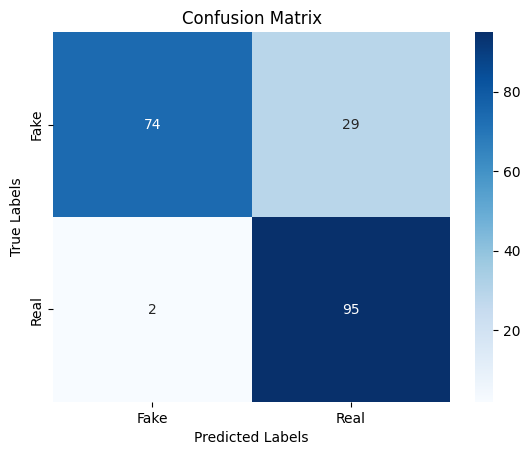